<a href="https://colab.research.google.com/github/adavals/BEDU_Sesion8/blob/main/postworks_1_al_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="celda-contenido"></a>
# ¿QUIEN SERÁ QUIEN?... EN LOS PRECIOS 🥇
---

- ### Introducción
- ### [Algoritmos de Clasificación No Supervisados](#celda-noSupervisados)
- ### [Algoritmos de Clasificación Supervisados](#celda-supervisados)
- ### [Modelos de Regresión Lineal y Polinomial](#celda-Regresion)
- ### [Regresión con Redes Neuronales](#celda-redes-neuronales)
- ### [Modelos de Regresión con Series de Tiempo](#celda-series-tiempo)
- ### [Regresión con Redes Neuronales y Series de Tiempo](#celda-redes-neuronales-series-tiempo)
- ### [Conclusiones](#celda-conclusiones)

- [Bitácora de experimentos](https://docs.google.com/spreadsheets/d/1fWHdcRouDn93rMP-zdZHFaxXZ1RL28YBDwih8zF9FWc/edit?usp=sharing)
- [Referencias](#celda-referencias)


# **Introducción**

---

El conocimiento preciso y actualizado de los precios de la canasta básica es esencial para entender la inflación, la economía y la calidad de vida de la población. 

PROFECO, es una institución gubernamental encargada de proteger los derechos de los consumidores en México, que proporciona información sobre los precios de la canasta básica en forma de datos abiertos. 

Estos datos parecen no estar siendo utilizados adecuadamente por el público en general. 

Es necesario analizar y utilizar esta información de manera efectiva para tener una comprensión completa de la situación económica del país y para mejorar la calidad de vida de la población.

## **Identificación del problema**

1. Falta de publicación completa de los datos de la canasta básica en la revista del consumidor PROFECO.

2. No se encontraron artículos de internet que hicieran referencia a los datos abiertos.

3. La aplicación móvil "Quién es Quién en los precios" es la única vía de comparación de precios disponible para el público en general, pero ya no muestra información actualizada.

4. Los datos abiertos publicados por PROFECO no suelen ser analizados o publicados de forma completa en medios accesibles para el público.

5. Falta de conocimiento del público en general sobre la disponibilidad y uso de los datos abiertos de la canasta básica.

## **Definición del problema**
Saber si los modelos de machine learning son efectivos para predecir precios de productos y que sea posible anticipar opciones de ahorro a los consumidores.

Entender mejor el problema y la información disponible aplicando algoritmos de clasificación no supervisados y supervisados.

## **Descripción de los datos**
PROFECO publica datos semanales sobre una muestra de precios de productos en el país. La información está disponible desde el año 2015 hasta las primeras semanas de 2023.
El formato de los archivos es separado por comas, conteniendo la siguiente información:

|Columna|Descripción|
|---|---|
|producto|Nombre del producto.|
|presentacion|Descripción de la presentación del producto.
|marca|Descripción de la marca del producto.
|categoria|Nombre de la categoría a la cual pertenece el producto.
|grupo|Nombre del grupo al que pertenece el producto.
|precio|Precio del producto de venta al público.
|fecha|Día, mes y año en que fue capturado el precio del producto en el establecimiento.
|marca_tienda|Conjunto de establecimientos que son sucursales de una misma marca comercial.
|tipo_tienda|Descripción del giro comercial.
|nombre_tienda|Nombre comercial asociado a la razón social del establecimiento.
|direccion|Dirección del establecimiento.
|estado|Entidad federativa en la que se localiza el establecimiento.
|municipio|Nombre del municipio o demarcación territorial en el que se localiza el establecimiento.
|latitud|Localización del establecimiento con respecto al ecuador. Expresadas en grados decimales
|longitud|Localización del establecimiento con respecto al meridiano 0 . Expresadas en grados decimales

## [Consultar Análisis Exploratorio de Datos](https://colab.research.google.com/drive/191Fy3rxhZdHNPaXozGXdt1cWbFCOov9Z?usp=sharing)

🏠 [Inicio](#celda-contenido)
<a name="celda-noSupervisados"></a>
# ***Algoritmos de Clasificación No Supervisados***
---
Para encontrar una forma de agrupar los precios se calculó un porcentaje de variación o diferencia respecto al mínimo precio de un producto-presentacion-marca y se le nombró: **diferencia_minimo**.

Se experimentó con el modelo k-Modes, en lugar de K-Means ya que la mayoría de las variables son categóricas y se combinó con la variable numérica diferencia_mínimo para generar los clusters.

**Resultados**

 - Se obtuvieron clusters definidos de acuerdo a la variable diferencia_mínimo y el grupo al que pertenece un producto. 



In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, kurtosis
import numpy as np

sns.set(style='white')
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

In [ ]:
df_raw = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df_raw.head(3)

producto           presentacion  marca                          categoria  \
0   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
1   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
2   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   

     grupo  precio_x       fecha    marca_tienda  \
0  BASICOS      56.0  2022-12-26    MEGA SORIANA   
1  BASICOS      56.0  2022-12-26        WAL-MART   
2  BASICOS      56.5  2022-12-28  BODEGA AURRERA   

                             tipo_tienda  \
0  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
1  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
2  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                          nombre_tienda  \
0  MEGA SORIANA SUCURSAL AGUASCALIENTES   
1       WALMART SUCURSAL PLAZA GALERIAS   
2                        BODEGA AURRERA   

                                           direccion          estado  \
0  AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...  AGUASCALIENTES   
1  INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...  AGUASCALIENTES   
2  CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...  AGUASCALIENTES   

        municipio    latitud    longitud     CP  precio_y  diferencia_minimo  
0  AGUASCALIENTES  21.916001 -102.290779  20116      47.0           1.191489  
1  AGUASCALIENTES  21.922922 -102.297692  20128      47.0           1.191489  
2  AGUASCALIENTES  21.886051 -102.312284  20180      47.0           1.202128

In [ ]:
# Estimados de locación y variabilidad:
def estimados(nombre):
  print(f'Promedio: {df_raw[nombre].mean()}')
  print(f'Mediana: {df_raw[nombre].median()} ')
  print(f'Media Truncada: {stats.trim_mean(df_raw[nombre], 0.1)}')
  print(f'Desviación estándar: {df_raw[nombre].std()}')
  print(f'Rango: {df_raw[nombre].max()-df_raw[nombre].min()}')
  print(f'Valor mínimo: {df_raw[nombre].min()}')
  print(f'Percentil 10: {df_raw[nombre].quantile(0.1)}')
  print(f'Percentil 25: {df_raw[nombre].quantile(0.25)}')
  print(f'Percentil 50: {df_raw[nombre].median()}')
  print(f'Percentil 75: {df_raw[nombre].quantile(0.75)}')
  print(f'Percentil 90: {df_raw[nombre].quantile(0.9)}')
  print(f'Valor máximo: {df_raw[nombre].max()}')
  print(f'Rango Intercuartil: {df_raw[nombre].quantile(0.75) - df_raw[nombre].quantile(0.25)}')

In [ ]:
estimados('diferencia_minimo')

Promedio: 1.4384343828960553
Mediana: 1.3311111111111111 
Media Truncada: 1.3643059530229693
Desviación estándar: 0.4576278763149921
Rango: 10.197509412105417
Valor mínimo: 1.0
Percentil 10: 1.0633816811052663
Percentil 25: 1.1685393258426966
Percentil 50: 1.3311111111111111
Percentil 75: 1.5555555555555556
Percentil 90: 1.878
Valor máximo: 11.197509412105417
Rango Intercuartil: 0.387016229712859


Para un 90% de los datos el porcentaje de diferencia con el precio mínimo es de 1.87, esto implicaría que lo que ocurre más frecuentemente es que el precio de un producto es menos del doble del precio mínimo. Hay un 10 % de casos extremos en que el precio está entre el doble y once veces el precio mínimo

In [ ]:
df_raw.sort_values(by='diferencia_minimo',ascending=False).head(3)

producto                         presentacion marca     categoria  \
64625   MONTELUKAST  20 COMPRIMIDOS O TABLETAS DE 10 MG.   S/M  MEDICAMENTOS   
209634       TEMPRA            CAJA 24 TABLETAS. 24 HRS.   S/M  MEDICAMENTOS   
209735       TEMPRA            CAJA 24 TABLETAS. 24 HRS.   S/M  MEDICAMENTOS   

               grupo  precio_x       fecha     marca_tienda tipo_tienda  \
64625   MEDICAMENTOS    386.65  2022-12-29  FARMACIA LA LUZ   FARMACIAS   
209634  MEDICAMENTOS    139.00  2022-12-29  SANBORN S HNOS.   FARMACIAS   
209735  MEDICAMENTOS    139.00  2022-12-29  SANBORN S HNOS.   FARMACIAS   

                         nombre_tienda  \
64625               FARMACIA DE LA LUZ   
209634  SANBORNS SUCURSAL AZCAPOTZALCO   
209735                        SANBORNS   

                                                direccion            estado  \
64625   GUERRERO 145, CALLEJON DE CORREA Y TACUBA, COL...         ZACATECAS   
209634  AZCAPOTZALCO 527, ESQ. 16 DE SEPTIEMBRE, COL. ...  CIUDAD DE MÉXICO   
209735                HIDALGO 212, COL. CENTRO, CP. 98000         ZACATECAS   

           municipio    latitud    longitud     CP  precio_y  \
64625      ZACATECAS  22.772126 -102.571900  98000     34.53   
209634  AZCAPOTZALCO  19.478129  -99.186518  02000     14.00   
209735     ZACATECAS  22.773333 -102.573643  98000     14.00   

        diferencia_minimo  
64625           11.197509  
209634           9.928571  
209735           9.928571

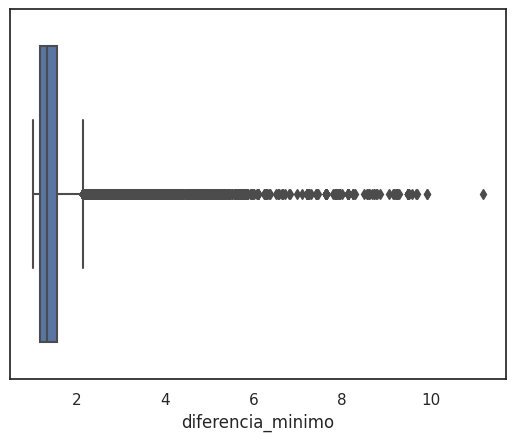

In [ ]:
# Revisión gráfica de casos extremos
sns.boxplot(x=df_raw['diferencia_minimo']);

In [ ]:
#Filtrado por rango intercualtilico
def filtradoIQR(nombre):
  iqr = df_raw[nombre].quantile(0.75) - df_raw[nombre].quantile(0.25)
  filtro_inferior = df_raw[nombre] > df_raw[nombre].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df_raw[nombre] < df_raw[nombre].quantile(0.75) + (iqr * 1.5)
  filtro_0 = df_raw[nombre] > 0
  df_filtrado = df_raw[filtro_inferior & filtro_superior]
  print('                      Sin Filtro   Con Filtro IQR')
  print(f'Media:          {df_raw[nombre].mean():16.2f} {df_filtrado[nombre].mean():16.2f}')
  print(f'Mediana:        {df_raw[nombre].median():16.2f} {df_filtrado[nombre].median():16.2f} ')
  print(f'Media Truncada: {stats.trim_mean(df_raw[nombre], 0.1):16.2f} {stats.trim_mean(df_filtrado[nombre], 0.1):16.2f}')
  print(f'Desviación est: {df_raw[nombre].std():16.2f} {df_filtrado[nombre].std():16.2f}')
  sns.boxplot(x=df_filtrado[nombre]);
  return df_filtrado
  

                      Sin Filtro   Con Filtro IQR
Media:                      1.44             1.35
Mediana:                    1.33             1.31 
Media Truncada:             1.36             1.33
Desviación est:             0.46             0.25


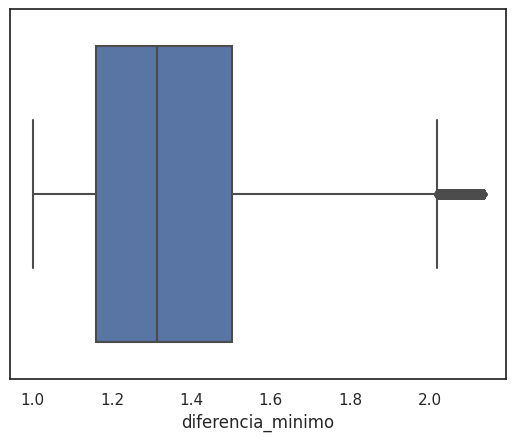

In [ ]:
df_filtrado = filtradoIQR('diferencia_minimo')

In [ ]:
# Funciones de apoyo para tabla de frecuencias y parametros de distribución
def tablaFrecuencias(dataframe, nombre):
  valores = dataframe[nombre]
  segmentos = pd.cut(valores, 20)
  print(dataframe[nombre].groupby(segmentos).count())

def parametrosDistribucion(dataframe, nombre):
  print(f'Curtosis: {kurtosis(dataframe[nombre])}')
  print(f'Asimetría: {skew(dataframe[nombre])}')
  sns.distplot(dataframe[nombre], kde=True, norm_hist=False, bins=20);

In [ ]:
tablaFrecuencias(df_filtrado, 'diferencia_minimo')

diferencia_minimo
(0.999, 1.057]    23778
(1.057, 1.114]    19788
(1.114, 1.17]     21109
(1.17, 1.227]     22201
(1.227, 1.284]    22777
(1.284, 1.341]    22163
(1.341, 1.398]    17850
(1.398, 1.454]    17327
(1.454, 1.511]    14729
(1.511, 1.568]    12776
(1.568, 1.625]     9298
(1.625, 1.682]     8471
(1.682, 1.738]     6474
(1.738, 1.795]     5220
(1.795, 1.852]     4582
(1.852, 1.909]     2896
(1.909, 1.966]     2492
(1.966, 2.022]     2922
(2.022, 2.079]     1857
(2.079, 2.136]     1487
Name: diferencia_minimo, dtype: int64


Curtosis: 0.09185584849532136
Asimetría: 0.7627687722081203


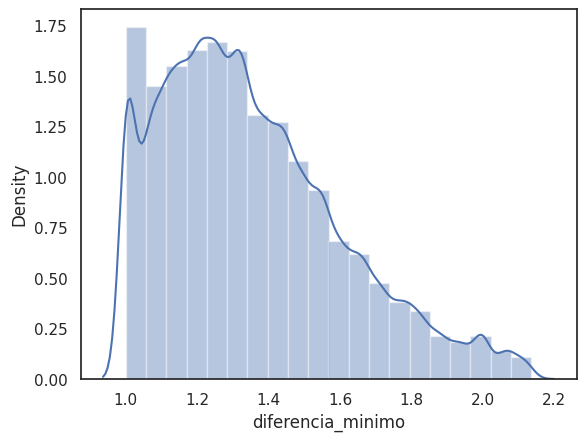

In [ ]:
parametrosDistribucion(df_filtrado, 'diferencia_minimo')

---
  - El porcentaje de diferencia con el precio mínimo presenta una distribución con cola larga
  - Asimetría positiva, 0.76, con cola más larga hacia la derecha
  - Curtosis positiva, 0.09, presenta algunos datos más alejados de la media
---

In [ ]:
df_filtrado.shape

(240197, 18)

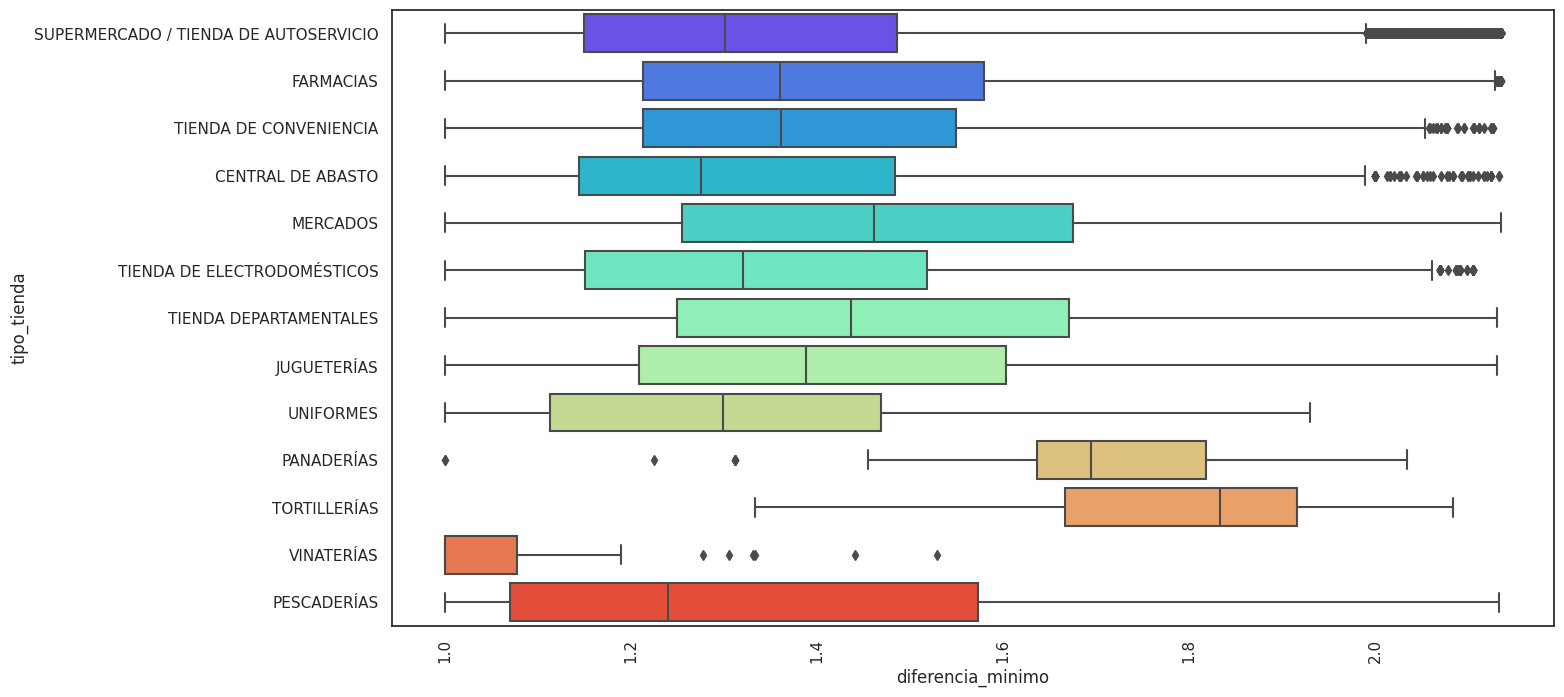

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x= 'diferencia_minimo',y='tipo_tienda', data = df_filtrado, palette = 'rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

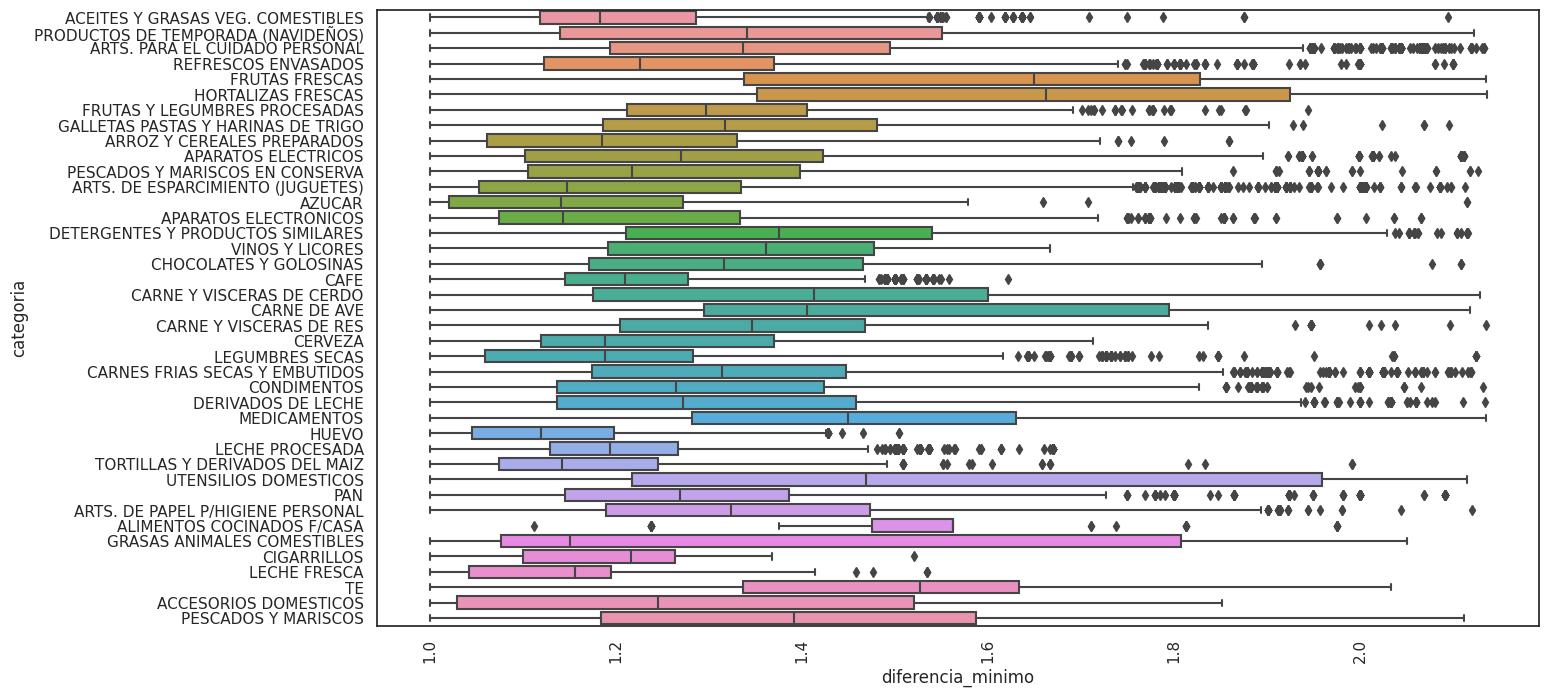

In [ ]:
df_filtrado2 = df_filtrado[df_filtrado['tipo_tienda']=='SUPERMERCADO / TIENDA DE AUTOSERVICIO']
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='diferencia_minimo', y='categoria', data = df_filtrado2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
# Codificación de variables categóricas para revisar correlacion con la proporción de diferencia con el mínimo precio
dfc = df_raw.drop(columns=[ 'precio_x', 'nombre_tienda', 'fecha', 'direccion', 'longitud', 'latitud', 'municipio', 'CP', 'precio_y'])
def codificacion_categoria(dataframe, nombre):
  dataframe[nombre] = dataframe[nombre].astype('category').cat.codes
codificacion_categoria(dfc, 'producto')
codificacion_categoria(dfc, 'presentacion')
codificacion_categoria(dfc, 'marca')
codificacion_categoria(dfc, 'categoria')
codificacion_categoria(dfc, 'grupo')
codificacion_categoria(dfc, 'marca_tienda')
codificacion_categoria(dfc, 'tipo_tienda')
codificacion_categoria(dfc, 'estado')

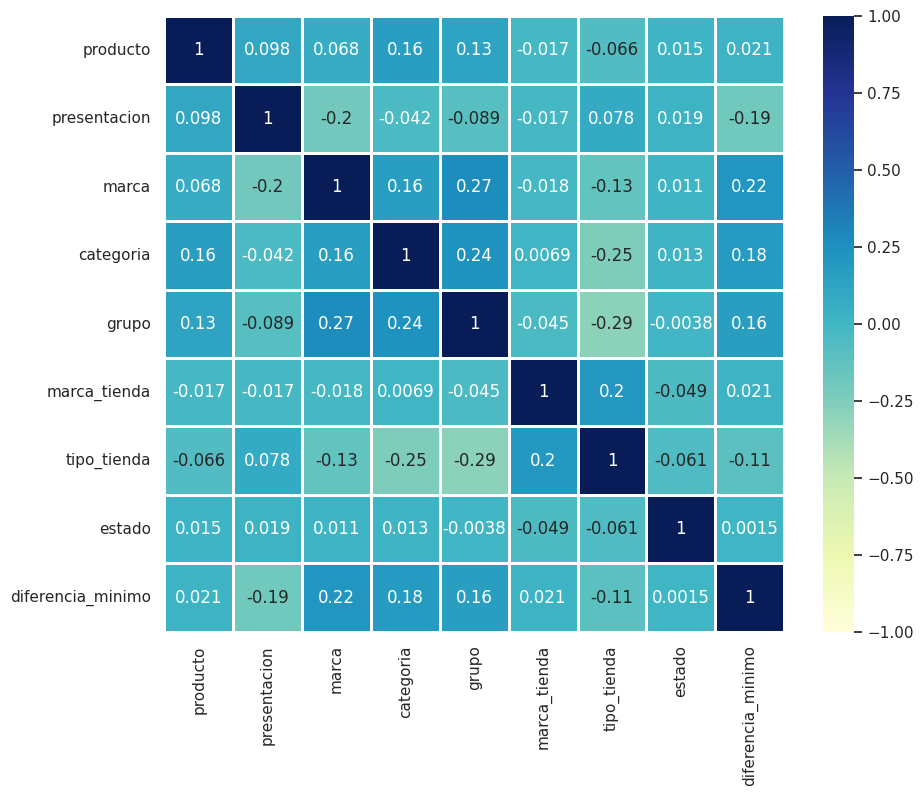

In [ ]:
# Grafica de correlacion
plt.figure(figsize=(10,8))
ax = sns.heatmap(dfc.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=1)

In [ ]:
# Se observa baja correlación entre las variables

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# X = df_raw.drop(columns=['fecha','precio_y', 'direccion'])
X = df_raw[['marca_tienda','diferencia_minimo']]
X.head(3)

marca_tienda  diferencia_minimo
0    MEGA SORIANA           1.191489
1        WAL-MART           1.191489
2  BODEGA AURRERA           1.202128

In [ ]:
#categorical_features_idx = [0,1,2,3,4,6,7,8,9,10,13]
categorical_features_idx = [0]

In [ ]:
mark_array=X.values

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 21462, ncost: 63473.62515963671
Run: 1, iteration: 2/20, moves: 8737, ncost: 63424.864084189656
Run: 1, iteration: 3/20, moves: 3738, ncost: 63411.61461823842
Run: 1, iteration: 4/20, moves: 1733, ncost: 63408.345500874224
Run: 1, iteration: 5/20, moves: 2497, ncost: 63394.08759516335
Run: 1, iteration: 6/20, moves: 1370, ncost: 63392.02967563737
Run: 1, iteration: 7/20, moves: 199, ncost: 63391.892091340786
Run: 1, iteration: 8/20, moves: 69, ncost: 63391.89034140623
Run: 1, iteration: 9/20, moves: 1, ncost: 63391.89034102997
Run: 1, iteration: 10/20, moves: 0, ncost: 63391.89034102997
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 97564, ncost: 64806.55552097246
Run: 2, iteration: 2/20, moves: 28211, ncost: 63315.51526852664
Run: 2, it

In [ ]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['1.21127504449046' 'WAL-MART']
 ['2.8125682354640613' 'WAL-MART']
 ['1.6009505674512619' 'HIPERMERCADO SORIANA']]


In [ ]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [ ]:
df_raw['cluster'] = list(clusters)

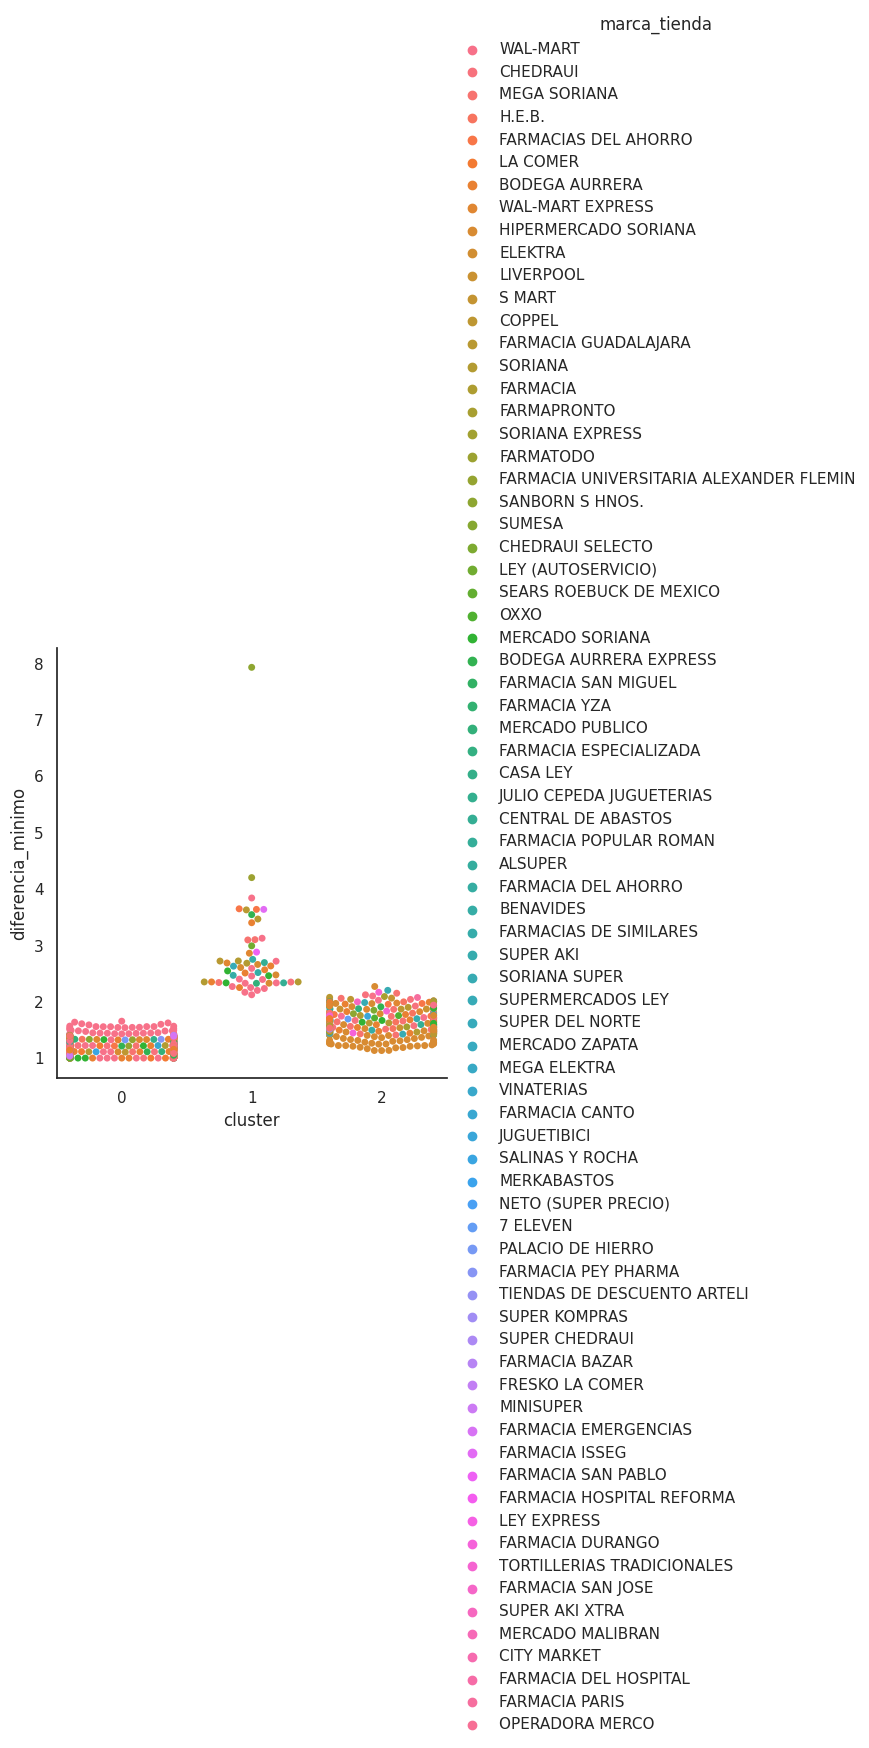

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='marca_tienda', kind='swarm', data=df_raw.sample(n=1000))

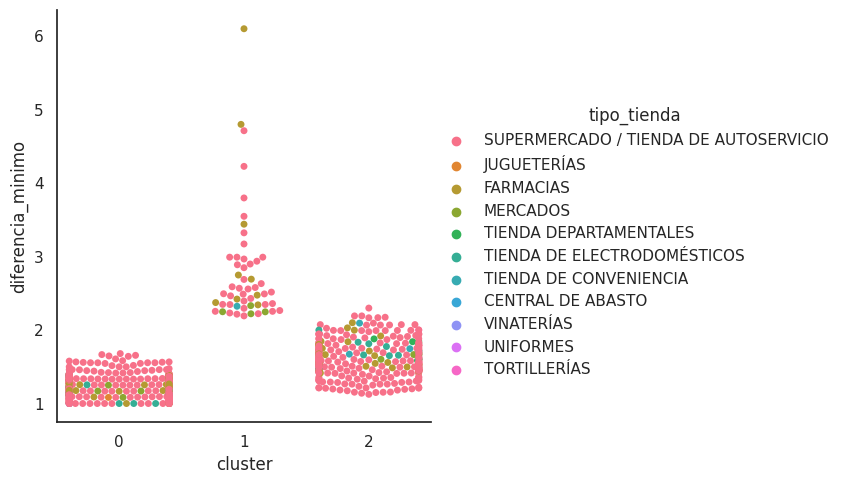

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='tipo_tienda', kind='swarm', data=df_raw.sample(n=1000))

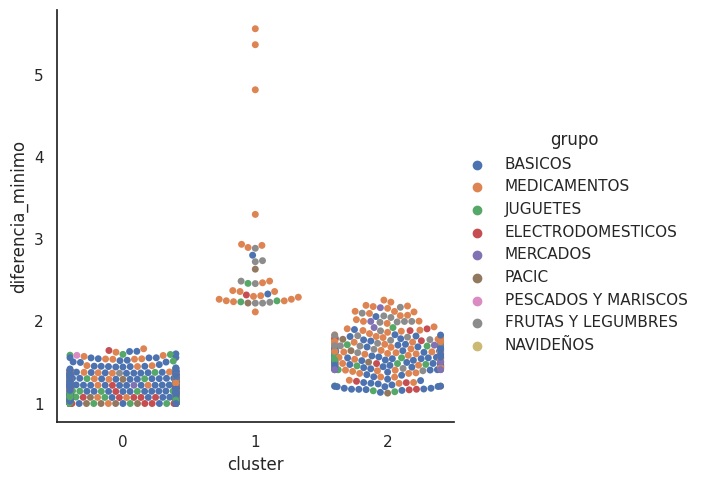

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='grupo', kind='swarm', data=df_raw.sample(n=1000))

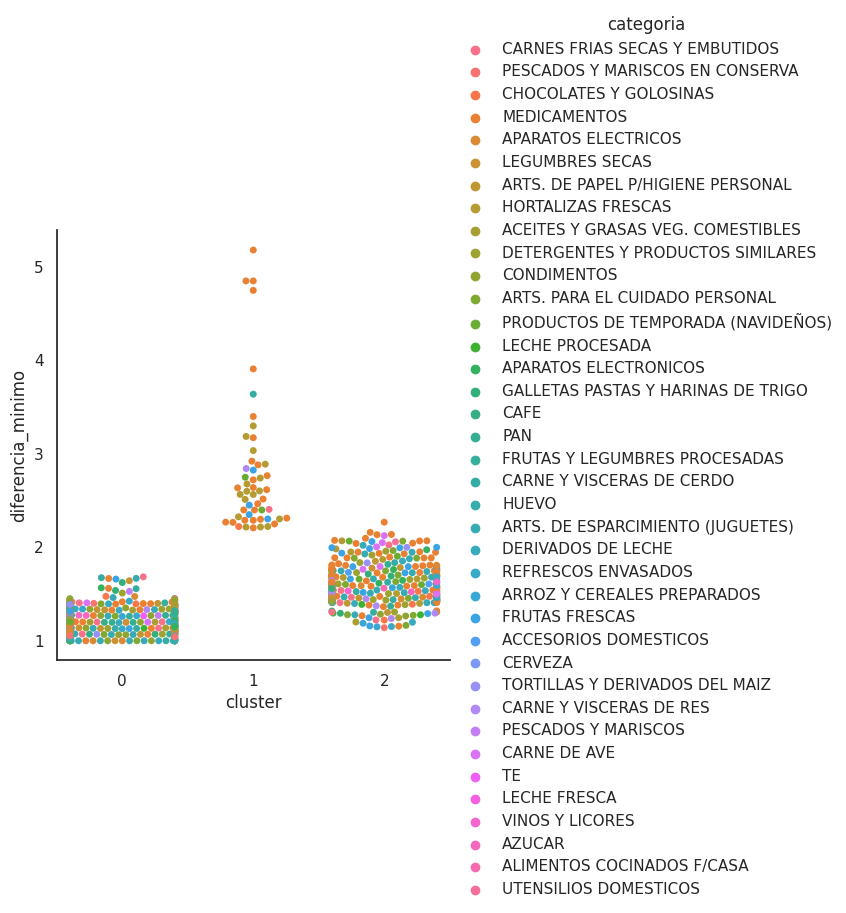

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='categoria', kind='swarm', data=df_raw.sample(n=1000))

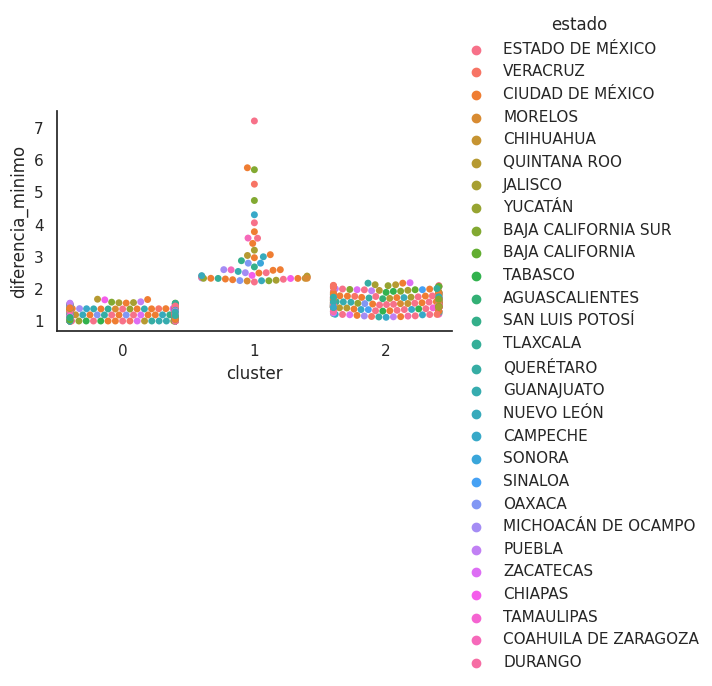

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='estado', kind='swarm', data=df_raw.sample(n=1000))

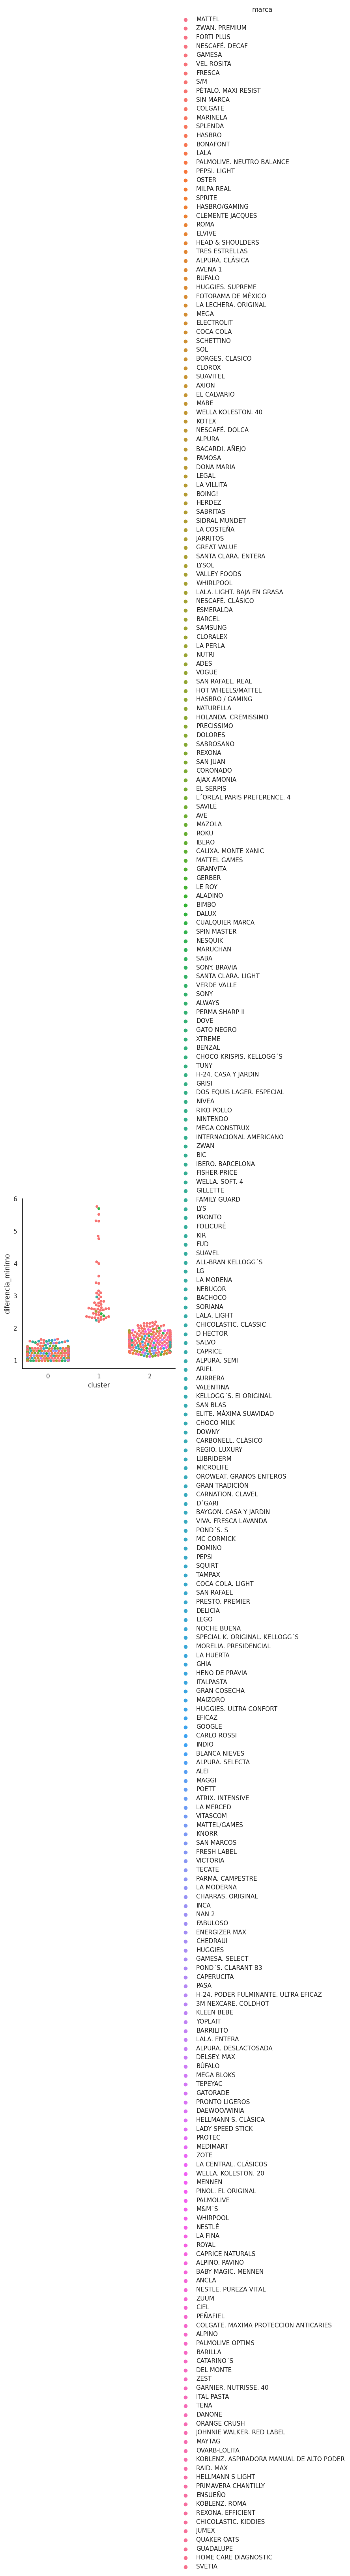

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='marca', kind='swarm', data=df_raw.sample(n=1000))

In [ ]:
# Descripción básica de clusters
df_cluster0 = df_raw[df_raw['cluster']==0]
df_cluster1 = df_raw[df_raw['cluster']==1]
df_cluster2 = df_raw[df_raw['cluster']==2]
print("                   \tCluster 0   \tCluster 1    \tCluster 2")
print(f"Tamaño            \t{df_cluster0.shape[0]:9} \t{df_cluster1.shape[0]:9} \t{df_cluster2.shape[0]:9}")
print(f"Diferencia mínima \t{df_cluster0['diferencia_minimo'].min():9.2f} \t{df_cluster1['diferencia_minimo'].min():9.2f} \t{df_cluster2['diferencia_minimo'].min():9.2f}")
print(f"Diferencia máxima \t{df_cluster0['diferencia_minimo'].max():9.2f} \t{df_cluster1['diferencia_minimo'].max():9.2f} \t{df_cluster2['diferencia_minimo'].max():9.2f}")

                   	Cluster 0   	Cluster 1    	Cluster 2
Tamaño            	   149911 	    13941 	    91664
Diferencia mínima 	     1.00 	     2.11 	     1.11
Diferencia máxima 	     1.70 	    11.20 	     2.30


### Hallazgos:
- En cuanto a la diferencia con el precio mínimo:
  - En el cluster 0 se ubican diferencias menores a 1.7, esto es, ningún precio llega a ser el doble del precio mínimo.
  - En el cluster 1 se ubican las diferencias mayores, esto es, todos los precios están entre el doble y once veces el precio mínimo.
  - En el tercer cluster se ubican diferencias intermedias entre 1.11 veces el precio mínimo y un máximo de 2.3.
  - El cluster 0 es 10 veces más grande que el cluster 1, asi que es más frecuente que la diferencia con el precio mínimo sea baja. Las diferencias respecto al precio mínimo altas son mucho menores.
- En cuanto a la variable marca_tienda no parece haber alguna tendencia en los grupos a que predomine alguna marca de tienda, esto es que en los diferentes clusters, de acuerdo a la diferencia con el precio mínimo, la marca de la tienda puede aparecer en los tres.
- Se observa una ligera tendencia en los grupos respecto a las variables grupo, categoría y marca de producto.

## Mapa de tiendas

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString

In [ ]:
centroide = [Point(xy) for xy in zip(df_raw["longitud"], df_raw["latitud"])]
df_geo = GeoDataFrame(df_raw, geometry=centroide, crs = 'epsg:4326')

In [ ]:
df_mapa = gpd.read_file('/vsicurl/https://github.com/adavals/bedu-datascience-f3m2/raw/main/dat/mapa_mexico/Division_Municipal_Mexico_2010.shp')\
        .set_index('CLAVE')\
        .to_crs(epsg=4326) 

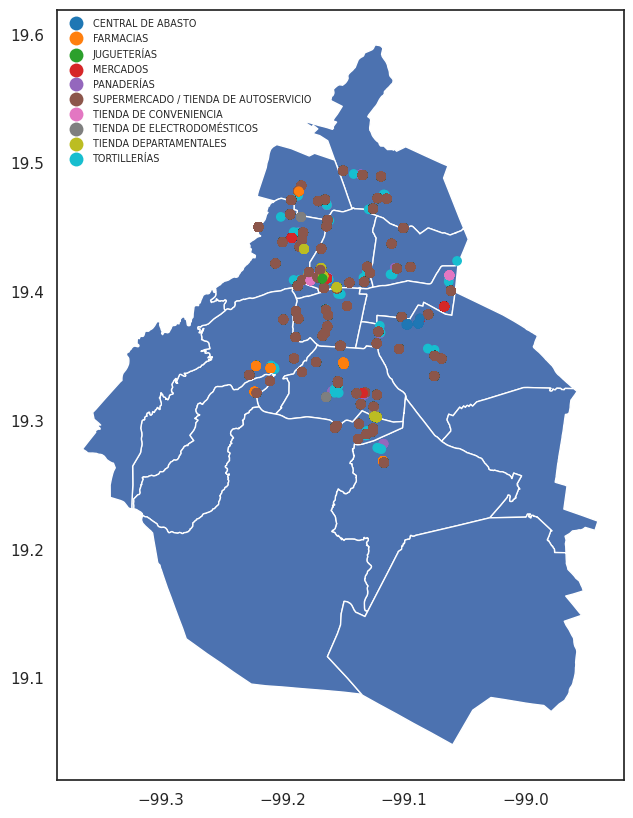

In [ ]:
estado_mapa = 'D.F.'
estado_productos = 'CIUDAD DE MÉXICO'
mapa = df_mapa[df_mapa['NOMEDO']==estado_mapa]['geometry'].plot(figsize=(10,10))
df_geo[df_geo['estado'] == estado_productos].plot('tipo_tienda', ax= mapa, legend = True, legend_kwds = {'loc': 'upper left', 'fontsize':'xx-small', 'framealpha':0}, figsize=(15,15));


In [ ]:
df_raw[df_raw['cluster']==0].head(10)

producto           presentacion  marca                          categoria  \
0    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
1    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
2    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
3    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
4    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
5    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
6    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
7    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
9    ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
10   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   

       grupo  precio_x       fecha          marca_tienda  \
0    BASICOS     56.00  2022-12-26          MEGA SORIANA   
1    BASICOS     56.00  2022-12-26              WAL-MART   
2    BASICOS     56.50  2022-12-28        BODEGA AURRERA   
3    BASICOS     57.50  2022-12-28  FARMACIA GUADALAJARA   
4    BASICOS     49.90  2022-12-28                  OXXO   
5    BASICOS     55.50  2022-12-29              CHEDRAUI   
6   MERCADOS     55.59  2022-12-29    CENTRAL DE ABASTOS   
7    BASICOS     49.90  2022-12-29                  OXXO   
9    BASICOS     55.90  2022-12-26     SUPERMERCADOS LEY   
10   BASICOS     50.00  2022-12-28              WAL-MART   

                              tipo_tienda  \
0   SUPERMERCADO / TIENDA DE AUTOSERVICIO   
1   SUPERMERCADO / TIENDA DE AUTOSERVICIO   
2   SUPERMERCADO / TIENDA DE AUTOSERVICIO   
3                               FARMACIAS   
4                  TIENDA DE CONVENIENCIA   
5   SUPERMERCADO / TIENDA DE AUTOSERVICIO   
6                       CENTRAL DE ABASTO   
7                  TIENDA DE CONVENIENCIA   
9   SUPERMERCADO / TIENDA DE AUTOSERVICIO   
10  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                                     nombre_tienda  \
0             MEGA SORIANA SUCURSAL AGUASCALIENTES   
1                  WALMART SUCURSAL PLAZA GALERIAS   
2                                   BODEGA AURRERA   
3          FARMACIA GUADALAJARA SUCURSAL DEL VALLE   
4             OXXO SUCURSAL MONTORO AGUASCALIENTES   
5                 CHEDRAUI SUCURSAL AGUASCALIENTES   
6   FRANCO SOLO CALIDAD SUCURSAL CENTRAL DE ABASTO   
7                         OXXO  SUCURSAL MORELOS 2   
9                         LEY SUCURSAL OTAY (1051)   
10              WALMART SUCURSAL TIJUANA HIPODROMO   

                                            direccion           estado  \
0   AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...   AGUASCALIENTES   
1   INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...   AGUASCALIENTES   
2   CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...   AGUASCALIENTES   
3   AGUASCALIENTES PTE. 908, ESQ. DINAMARCA, COL. ...   AGUASCALIENTES   
4   JUAN DE MONTORO 201, ESQUINA DR. JESUS DIAZ DE...   AGUASCALIENTES   
5   BLVD. JOSE MA. CHAVEZ 1809, ENTRE VALENTE QUIN...   AGUASCALIENTES   
6   AV. MAHATMA GANDHI S/N. BLOCK H LOCAL 20, INT....   AGUASCALIENTES   
7   JOSE MARIA MORELOS Y PAVON 222, ENTRE IGNACIO ...   AGUASCALIENTES   
9   BLVD. LAZARO CARDENAS Y CALZ. TECNOLOGICO S/N,...  BAJA CALIFORNIA   
10  AGUACALIENTE, ESQ. PASEO DE LAS AMERICAS 11999...  BAJA CALIFORNIA   

         municipio    latitud    longitud     CP  precio_y  diferencia_minimo  \
0   AGUASCALIENTES  21.916001 -102.290779  20116      47.0           1.191489   
1   AGUASCALIENTES  21.922922 -102.297692  20128      47.0           1.191489   
2   AGUASCALIENTES  21.886051 -102.312284  20180      47.0           1.202128   
3   AGUASCALIENTES  21.876563 -102.318612  20080      47.0           1.223404   
4   AGUASCALIENTES  21.880795 -102.294251  20000      47.0           1.061702   
5   AGUASCALIENTES  21.854349 -102.294259  20280      47.0           

### Experimento 2, usar la variable grupo en lugar de marca_tienda para generar clusters

In [ ]:
# Experimento 2, usar la variable grupo en lugar de marca_tienda para generar clusters
X = df_raw[['grupo','diferencia_minimo']]
X.head(3)

grupo  diferencia_minimo
0  BASICOS           1.191489
1  BASICOS           1.191489
2  BASICOS           1.202128

In [ ]:
categorical_features_idx = [0]
mark_array=X.values
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 11631, ncost: 45877.78181346211
Run: 1, iteration: 2/20, moves: 39532, ncost: 39801.91292100037
Run: 1, iteration: 3/20, moves: 9856, ncost: 39460.24626861465
Run: 1, iteration: 4/20, moves: 2521, ncost: 39392.46647495937
Run: 1, iteration: 5/20, moves: 1516, ncost: 39368.919379880615
Run: 1, iteration: 6/20, moves: 934, ncost: 39363.57515683612
Run: 1, iteration: 7/20, moves: 209, ncost: 39363.34666257224
Run: 1, iteration: 8/20, moves: 25, ncost: 39363.344903971
Run: 1, iteration: 9/20, moves: 4, ncost: 39363.344857636264
Run: 1, iteration: 10/20, moves: 0, ncost: 39363.344857636264
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 50119, ncost: 43177.74701817975
Run: 2, iteration: 2/20, moves: 11231, ncost: 42185.13178958717
Run: 2, iter

In [ ]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['1.2670799316033108' 'BASICOS']
 ['2.775342209727484' 'MEDICAMENTOS']
 ['1.541324113493222' 'MEDICAMENTOS']]


In [ ]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df_raw['cluster'] = list(clusters)

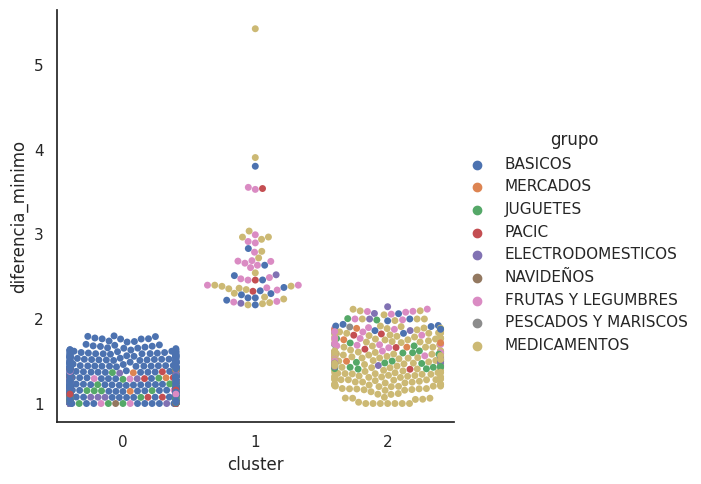

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='grupo', kind='swarm', data=df_raw.sample(n=1000))

In [ ]:
# Descripción básica de clusters
df_cluster0 = df_raw[df_raw['cluster']==0]
df_cluster1 = df_raw[df_raw['cluster']==1]
df_cluster2 = df_raw[df_raw['cluster']==2]
print("                   \tCluster 0   \tCluster 1    \tCluster 2")
print(f"Tamaño            \t{df_cluster0.shape[0]:9} \t{df_cluster1.shape[0]:9} \t{df_cluster2.shape[0]:9}")
print(f"Diferencia mínima \t{df_cluster0['diferencia_minimo'].min():9.2f} \t{df_cluster1['diferencia_minimo'].min():9.2f} \t{df_cluster2['diferencia_minimo'].min():9.2f}")
print(f"Diferencia máxima \t{df_cluster0['diferencia_minimo'].max():9.2f} \t{df_cluster1['diferencia_minimo'].max():9.2f} \t{df_cluster2['diferencia_minimo'].max():9.2f}")

                   	Cluster 0   	Cluster 1    	Cluster 2
Tamaño            	   162720 	    14858 	    77938
Diferencia mínima 	     1.00 	     2.16 	     1.00
Diferencia máxima 	     1.82 	    11.20 	     2.16


<a name="celda-noSupervisados-experimento2"></a>


### Experimento 2:
- En cuanto a la diferencia con el precio mínimo:
  - En el cluster 0 se ubican las diferencias mayores, esto es, todos los precios están entre el doble y once veces el precio mínimo.
  - En el cluster 1 se ubican diferencias menores ahora hasta 1.82, esto es, ningún precio llega a ser el doble del precio mínimo.
  - En el tercer cluster se ubican diferencias intermedias, pero ahora si incluye desde el precio mínimo, 1 hasta el doble, 2.16 veces.
  - Se observa que hay tendencias en los grupos de productos a ubicarse en cierto cluster, por ejemplo: los medicamentos y las frutas y legumbres están con frecuencia en el cluster donde hay más diferencia con el precio mínimo, esto es que como consumidores es recomendable comparar el precio de un medicamento o frutas y legumbres con más cuidado que con otros grupos de producto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salvar archivo con información de clusters
df_raw.to_csv('/content/drive/MyDrive/BeduDSF3M2/postwork/532022_kModes_grupo.csv')

🏠 [Inicio](#celda-contenido)
<a name="celda-supervisados"></a>
# ***Algoritmos de Clasificación Supervisados***
---
Un modelo de clasificación podría apoyar al consumidor indicando si el precio de un producto puede tener una variación grande respecto al precio mínimo.

En clasificación no supervisada obtuvimos grupos que intuitivamente se  pueden describir como:
  1. Productos con alta variación en su diferencia con el precio mínimo de unos cuantos grupos
  2. Productos con poca variación en su precio mínimo principalmente del grupo básico 
  3. Productos con variación media y que incluyen básicos y otros grupos.


Con la referencia anterior se aplicó clasificación supervisada para estas tres clases con los modelos: 
 - DecisionTreeClassifier
 - RandomForestClassifier
 
**Resultados**  
- Ambos  modelos tuvieron una precision alta de 98%, DecisionTreeClassifier tuvo un desempeño un poco más alto de 98.7%.
- En la gráfica del árbol de decisión se observa que la marca de un producto puede ser uno de los factores más relevantes respecto a su variación respecto al minimo y también están involucradas múltiples variables como el producto en si, la categoría/grupo, la marca de la tienda, el precio, el municipio, incluso el código postal.



In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df.head(3)

producto           presentacion  marca                          categoria  \
0   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
1   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
2   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   

     grupo  precio_x       fecha    marca_tienda  \
0  BASICOS      56.0  2022-12-26    MEGA SORIANA   
1  BASICOS      56.0  2022-12-26        WAL-MART   
2  BASICOS      56.5  2022-12-28  BODEGA AURRERA   

                             tipo_tienda  \
0  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
1  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
2  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                          nombre_tienda  \
0  MEGA SORIANA SUCURSAL AGUASCALIENTES   
1       WALMART SUCURSAL PLAZA GALERIAS   
2                        BODEGA AURRERA   

                                           direccion          estado  \
0  AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...  AGUASCALIENTES   
1  INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...  AGUASCALIENTES   
2  CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...  AGUASCALIENTES   

        municipio    latitud    longitud     CP  precio_y  diferencia_minimo  
0  AGUASCALIENTES  21.916001 -102.290779  20116      47.0           1.191489  
1  AGUASCALIENTES  21.922922 -102.297692  20128      47.0           1.191489  
2  AGUASCALIENTES  21.886051 -102.312284  20180      47.0           1.202128

### Creación de variable de salida para el árbol de decisión
En el atributo clase_precio se asignó la clasificación del precio del producto, considerando cuánto varía respecto al precio mínimo. Como punto de partida se designaron 3 rangos en base a la variable diferencia_minimo y los resultados de los clusters generados con el algoritmo k-modes.
- clase 1:   entre 1.00 y 1.75
- clase 2:   entre 1.75 y 2.15
- clase 3:   mayor a 2.15

In [ ]:
def condition(x):
    if x<1.75:
        return 1
    elif x<2.15:
        return 2
    else:
        return 3

In [ ]:
df["clase_precio"] = df['diferencia_minimo'].apply(condition)

In [ ]:
df['grupo'].unique()

array(['BASICOS', 'MERCADOS', 'PACIC', 'FRUTAS Y LEGUMBRES',
       'ELECTRODOMESTICOS', 'JUGUETES', 'MEDICAMENTOS', 'NAVIDEÑOS',
       'PESCADOS Y MARISCOS'], dtype=object)

In [ ]:
df['categoria'].unique()

array(['ACEITES Y GRASAS VEG. COMESTIBLES',
       'PRODUCTOS DE TEMPORADA (NAVIDEÑOS)',
       'ARTS. PARA EL CUIDADO PERSONAL', 'REFRESCOS ENVASADOS',
       'FRUTAS FRESCAS', 'HORTALIZAS FRESCAS',
       'FRUTAS Y LEGUMBRES PROCESADAS',
       'GALLETAS PASTAS Y HARINAS DE TRIGO',
       'ARROZ Y CEREALES PREPARADOS', 'APARATOS ELECTRICOS',
       'PESCADOS Y MARISCOS EN CONSERVA',
       'ARTS. DE ESPARCIMIENTO (JUGUETES)', 'AZUCAR',
       'APARATOS ELECTRONICOS', 'DETERGENTES Y PRODUCTOS SIMILARES',
       'VINOS Y LICORES', 'CHOCOLATES Y GOLOSINAS', 'CAFE',
       'CARNE Y VISCERAS DE CERDO', 'CARNE DE AVE',
       'CARNE Y VISCERAS DE RES', 'CERVEZA', 'LEGUMBRES SECAS',
       'CARNES FRIAS SECAS Y EMBUTIDOS', 'CONDIMENTOS',
       'DERIVADOS DE LECHE', 'MEDICAMENTOS', 'HUEVO', 'LECHE PROCESADA',
       'TORTILLAS Y DERIVADOS DEL MAIZ', 'UTENSILIOS DOMESTICOS', 'PAN',
       'ARTS. DE PAPEL P/HIGIENE PERSONAL', 'ALIMENTOS COCINADOS F/CASA',
       'GRASAS ANIMALES COMESTIBLES',

In [ ]:
df['estado'].unique()

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'CIUDAD DE MÉXICO',
       'COAHUILA DE ZARAGOZA', 'DURANGO', 'ESTADO DE MÉXICO',
       'GUANAJUATO', 'GUERRERO', 'JALISCO', 'MICHOACÁN DE OCAMPO',
       'MORELOS', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERÉTARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype=object)

In [ ]:
# Dataset filtrado debido a una alta cantidad de valores en las variables categóricas
# PACIC : Paquete contra la inflación y la carestía
filter1 = df['grupo']=='PACIC'
filter2 = df['estado']=='CIUDAD DE MÉXICO'

df = df[filter1 & filter2]

In [ ]:
df.drop(["presentacion","fecha", "direccion", "nombre_tienda", "estado", "latitud", "longitud","precio_y","diferencia_minimo"], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) < 55:
    categorical_col.append(column)

In [ ]:
categorical_col

['producto',
 'marca',
 'categoria',
 'grupo',
 'marca_tienda',
 'tipo_tienda',
 'municipio']

In [ ]:
df.head(3)

producto marca                          categoria  grupo  precio_x  \
352   ACEITE   AVE  ACEITES Y GRASAS VEG. COMESTIBLES  PACIC      39.0   
353   ACEITE   AVE  ACEITES Y GRASAS VEG. COMESTIBLES  PACIC      39.0   
354   ACEITE   AVE  ACEITES Y GRASAS VEG. COMESTIBLES  PACIC      37.0   

     marca_tienda                            tipo_tienda       municipio  \
352      LA COMER  SUPERMERCADO / TIENDA DE AUTOSERVICIO  ÁLVARO OBREGÓN   
353  MEGA SORIANA  SUPERMERCADO / TIENDA DE AUTOSERVICIO  ÁLVARO OBREGÓN   
354        SUMESA  SUPERMERCADO / TIENDA DE AUTOSERVICIO  ÁLVARO OBREGÓN   

        CP  clase_precio  
352  01770             1  
353  10200             1  
354  01000             1

In [ ]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop("clase_precio", axis=1)
y = df.clase_precio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[846,   2,   0],
       [  4,  66,   1],
       [  4,   1,  62]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import precision_score, recall_score

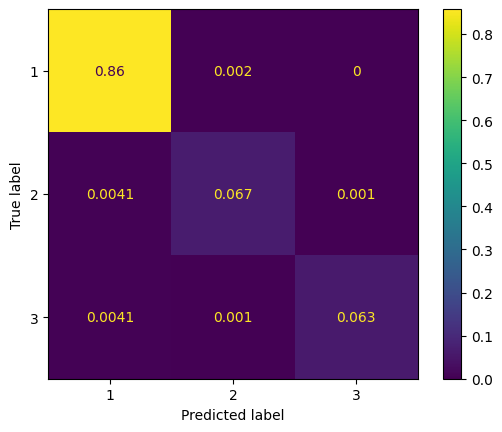

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tree_clf.classes_)
disp.plot()
plt.show()

In [ ]:
# desempeño en clasificacion binaria

def calcular_precision(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
# desempeño en clasificacion multiclase

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.9878296146044625

The precision is the ratio tp / (tp + fp) where tp is the number of
true positives and fp the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

In [ ]:
recall_score(y_test, y_pred, average='micro')

0.9878296146044625

The recall is the ratio tp / (tp + fn) where tp is the number of
true positives and fn the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [ ]:
df.shape

(3286, 10)

In [ ]:
df.head(3)

producto  marca  categoria  grupo  precio_x  marca_tienda  tipo_tienda  \
352         0      3          0      0      39.0             5            0   
353         0      3          0      0      39.0             6            0   
354         0      3          0      0      37.0            10            0   

     municipio     CP  clase_precio  
352         12  01770             1  
353         12  10200             1  
354         12  01000             1

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

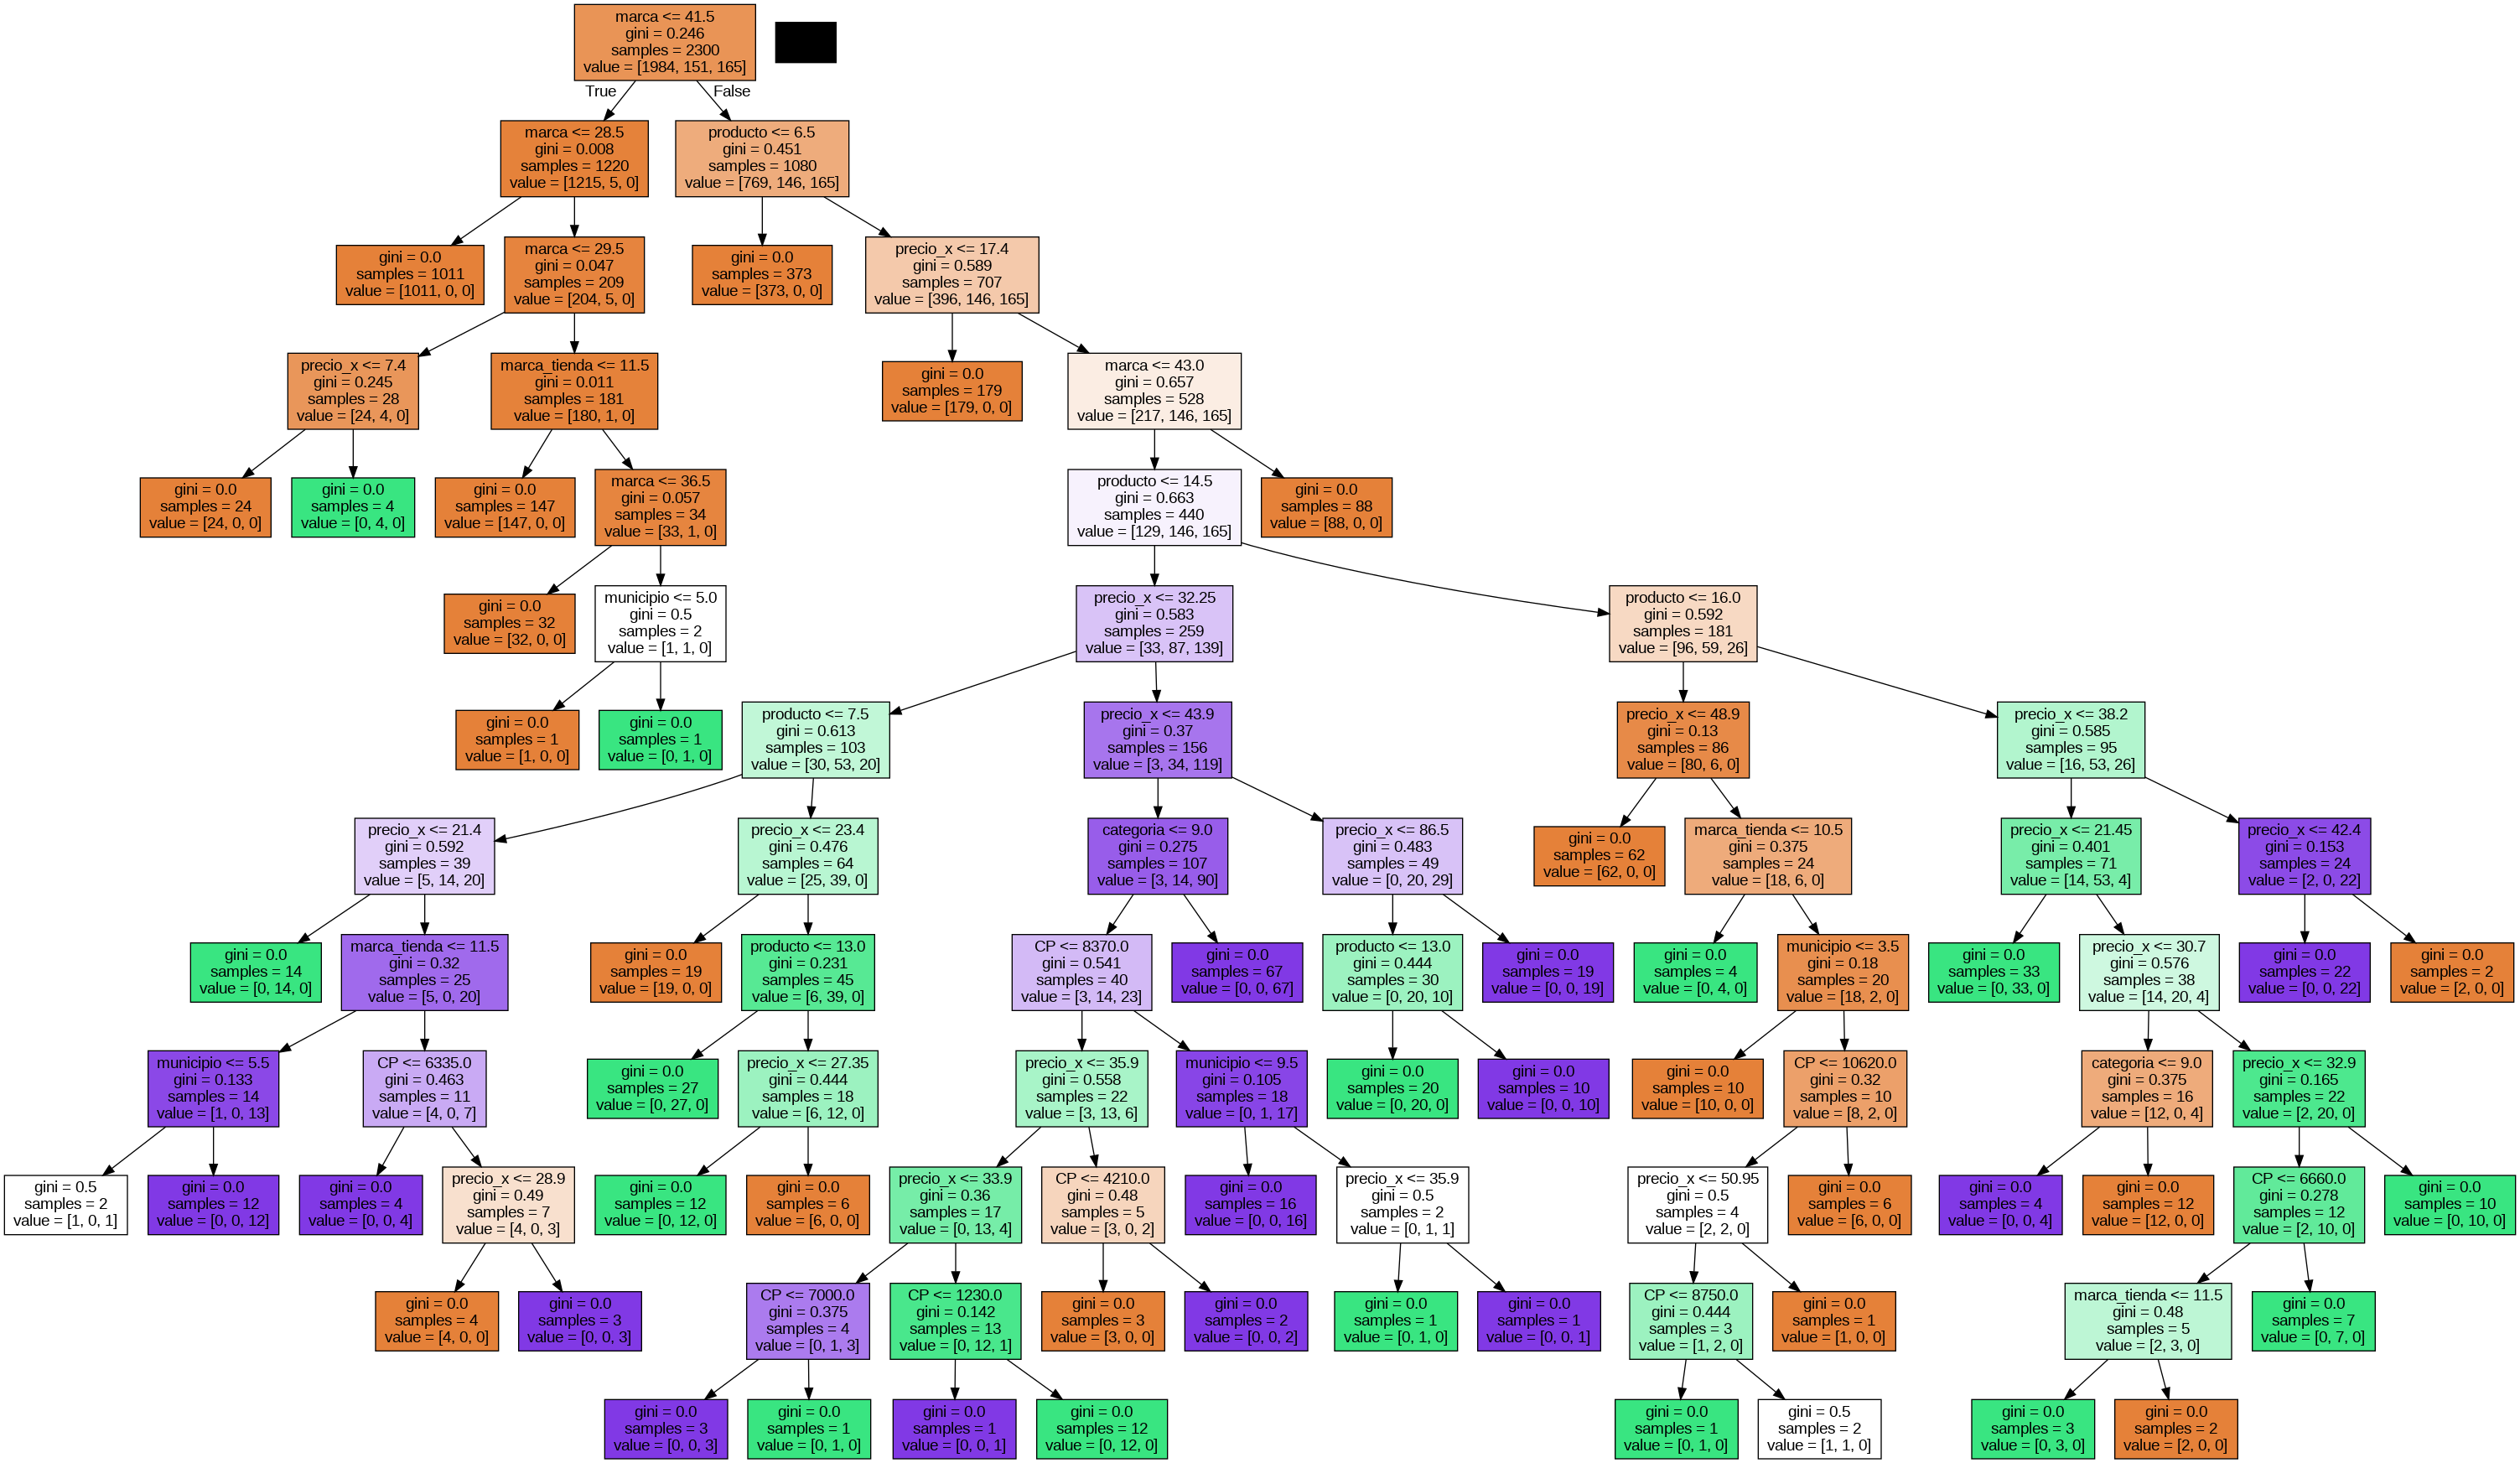

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Hallazgos
- El modelo de árbol de decisión puede clasificar el precio de un producto con un 98% de precisión, esto es que el modelo puede alertar a un consumidor sobre si el precio de un producto puede tener una variación grande respecto al precio mínimo con alta precisión.
- La marca de un producto puede ser uno de los factores más relevantes respecto a su variación respecto al minimo, pero, como se puede observar en la gráfica, pueden intervenir múltiples variables como el producto en si, la categoría, la marca de la tienda, el precio, el municipio, incluso el código postal.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
def condition(x):
    if x<1.75:
        return 1
    elif x<2.15:
        return 2
    else:
        return 3

In [ ]:
df["clase_precio"] = df['diferencia_minimo'].apply(condition)

In [ ]:
filter1 = df['grupo']=='PACIC'
filter2 = df['estado']=='CIUDAD DE MÉXICO'

df = df[filter1 & filter2]

In [ ]:
df.drop(["presentacion","fecha", "direccion", "nombre_tienda", "estado", "latitud", "longitud","precio_y","diferencia_minimo"], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) < 55:
    categorical_col.append(column)

In [ ]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop("clase_precio", axis=1)
y = df.clase_precio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[847,   3,   2],
       [  7,  58,   1],
       [  0,   5,  63]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import precision_score, recall_score

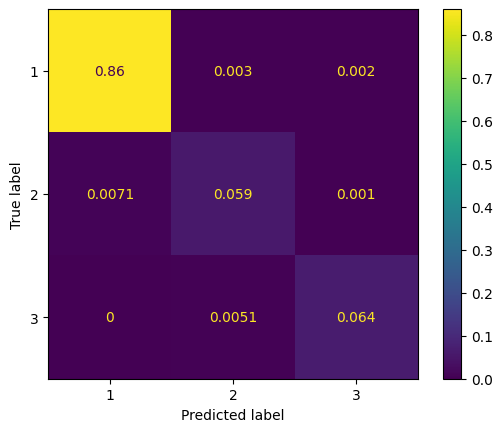

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [ ]:
# desempeño en clasificacion multiclase

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.9817444219066938

In [ ]:
recall_score(y_test, y_pred, average='micro')

0.9817444219066938

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parámetros del experimento anterior como base para grid search
# n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None
n_estimators = [100, 300]
max_features = ['sqrt', 'log2']
max_depth = None
min_samples_split = [2, 4]
min_samples_leaf = [1, 2]
bootstrap = [True]


In [ ]:
params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap':bootstrap
}

In [ ]:
grid_search_cv = GridSearchCV(rf_clf, params_grid, scoring='f1', cv=3, verbose=1, n_jobs=3)

In [ ]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 300]},
             scoring='f1', verbose=1)

In [ ]:
best_params = grid_search_cv.best_params_

In [ ]:
best_params

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_clf_optimized = RandomForestClassifier(**best_params)

In [ ]:
rf_clf_optimized.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf_optimized.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[847,   2,   3],
       [  8,  58,   0],
       [  0,   4,  64]])

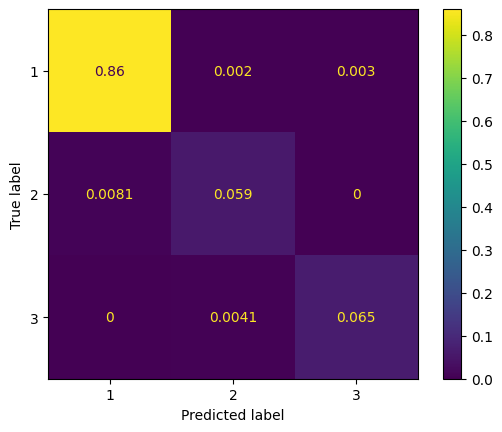

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.9827586206896551

In [ ]:
recall_score(y_test, y_pred, average='micro')

0.9827586206896551

### ***Validación Cruzada para el modelo RandomForest***

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [ ]:
scores = cross_val_score(rf_clf_optimized, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.985 (0.006)


🏠 [Inicio](#celda-contenido)
<a name="celda-Regresion"></a>
# ***Modelos de Regresión Lineal y Polinomial***
Con los modelos de regresión buscamos predecir el siguiente valor de las variables diferencia_minima y precio usando las variables categóricas como entradas.
Se aplicaron los modelos:
 - LinearRegression
 - PolynomialFeatures

**Resultados**

Con el modelo lineal se obtuvo un score de prácticamente 0, de acuerdo con la documentación de sklearn, significa que el modelo predice siempre el mismo valor para y, sin importar los valores de X de entrada. Lo que llaman, un modelo constante.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Con los modelos polinomiales el mejor desempeño fue con la variable precio y 4 grados, donde se obtuvo un R2 de .57, esto es que las variables del modelo explican un 57% del comportamiento del precio.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
df_raw = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df_raw.head(3)

producto           presentacion  marca                          categoria  \
0   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
1   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
2   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   

     grupo  precio_x       fecha    marca_tienda  \
0  BASICOS      56.0  2022-12-26    MEGA SORIANA   
1  BASICOS      56.0  2022-12-26        WAL-MART   
2  BASICOS      56.5  2022-12-28  BODEGA AURRERA   

                             tipo_tienda  \
0  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
1  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
2  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                          nombre_tienda  \
0  MEGA SORIANA SUCURSAL AGUASCALIENTES   
1       WALMART SUCURSAL PLAZA GALERIAS   
2                        BODEGA AURRERA   

                                           direccion          estado  \
0  AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...  AGUASCALIENTES   
1  INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...  AGUASCALIENTES   
2  CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...  AGUASCALIENTES   

        municipio    latitud    longitud     CP  precio_y  diferencia_minimo  
0  AGUASCALIENTES  21.916001 -102.290779  20116      47.0           1.191489  
1  AGUASCALIENTES  21.922922 -102.297692  20128      47.0           1.191489  
2  AGUASCALIENTES  21.886051 -102.312284  20180      47.0           1.202128

In [ ]:
def codificacion_categoria(dataframe, nombre):
  dataframe[nombre] = dataframe[nombre].astype('category').cat.codes

In [ ]:
codificacion_categoria(df_raw, 'producto')
codificacion_categoria(df_raw, 'presentacion')
codificacion_categoria(df_raw, 'marca')
codificacion_categoria(df_raw, 'categoria')
codificacion_categoria(df_raw, 'grupo')
codificacion_categoria(df_raw, 'marca_tienda')
codificacion_categoria(df_raw, 'tipo_tienda')
codificacion_categoria(df_raw, 'estado')

In [ ]:
X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
y = df_raw['diferencia_minimo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

0.1953490725400997

In [ ]:
lr.score(X_test, y_test)

0.0784337659371136

In [ ]:
np.sum(cross_val_score(lr, X, y)) / 5

0.04530192554581571

El score es prácticamente 0, de acuerdo con la documentación de sklearn, significa que el modelo predice siempre el mismo valor para y, sin importar los valores de X de entrada. Lo que llaman, un modelo constante.
 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
df_raw = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df_raw.head(3)

producto           presentacion  marca                          categoria  \
0   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
1   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
2   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   

     grupo  precio_x       fecha    marca_tienda  \
0  BASICOS      56.0  2022-12-26    MEGA SORIANA   
1  BASICOS      56.0  2022-12-26        WAL-MART   
2  BASICOS      56.5  2022-12-28  BODEGA AURRERA   

                             tipo_tienda  \
0  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
1  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
2  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                          nombre_tienda  \
0  MEGA SORIANA SUCURSAL AGUASCALIENTES   
1       WALMART SUCURSAL PLAZA GALERIAS   
2                        BODEGA AURRERA   

                                           direccion          estado  \
0  AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...  AGUASCALIENTES   
1  INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...  AGUASCALIENTES   
2  CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...  AGUASCALIENTES   

        municipio    latitud    longitud     CP  precio_y  diferencia_minimo  
0  AGUASCALIENTES  21.916001 -102.290779  20116      47.0           1.191489  
1  AGUASCALIENTES  21.922922 -102.297692  20128      47.0           1.191489  
2  AGUASCALIENTES  21.886051 -102.312284  20180      47.0           1.202128

In [ ]:
def codificacion_categoria(dataframe, nombre):
  dataframe[nombre] = dataframe[nombre].astype('category').cat.codes

In [ ]:
codificacion_categoria(df_raw, 'producto')
codificacion_categoria(df_raw, 'presentacion')
codificacion_categoria(df_raw, 'marca')
codificacion_categoria(df_raw, 'categoria')
codificacion_categoria(df_raw, 'grupo')
codificacion_categoria(df_raw, 'marca_tienda')
codificacion_categoria(df_raw, 'tipo_tienda')
codificacion_categoria(df_raw, 'estado')

In [ ]:
X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
y = df_raw['diferencia_minimo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

0.1953490725400997

In [ ]:
lr.score(X_test, y_test)

0.0784337659371136

In [ ]:
np.sum(cross_val_score(lr, X, y)) / 5

0.04530192554581571

El score es prácticamente 0, de acuerdo con la documentación de sklearn, significa que el modelo predice siempre el mismo valor para y, sin importar los valores de X de entrada. Lo que llaman, un modelo constante. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [ ]:
X = df_raw[['producto','presentacion','marca','categoria','grupo','marca_tienda','estado','tipo_tienda','longitud','latitud']]
y = df_raw['precio_x']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_predict = lr2.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

4790518.190142499

In [ ]:
lr2.score(X_test, y_test)

0.13679525051477337

In [ ]:
np.sum(cross_val_score(lr2, X, y)) / 5

-1.3926488333344267

### **Normalización**
Considerando sólo las variables del primer experimento

In [1]:
def z_score(df):
  df_z_score = (df - df.mean()) / df.std()
  return df_z_score

def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

def log(df):
  return np.log(df)

In [ ]:
X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
y = df_raw['diferencia_minimo']

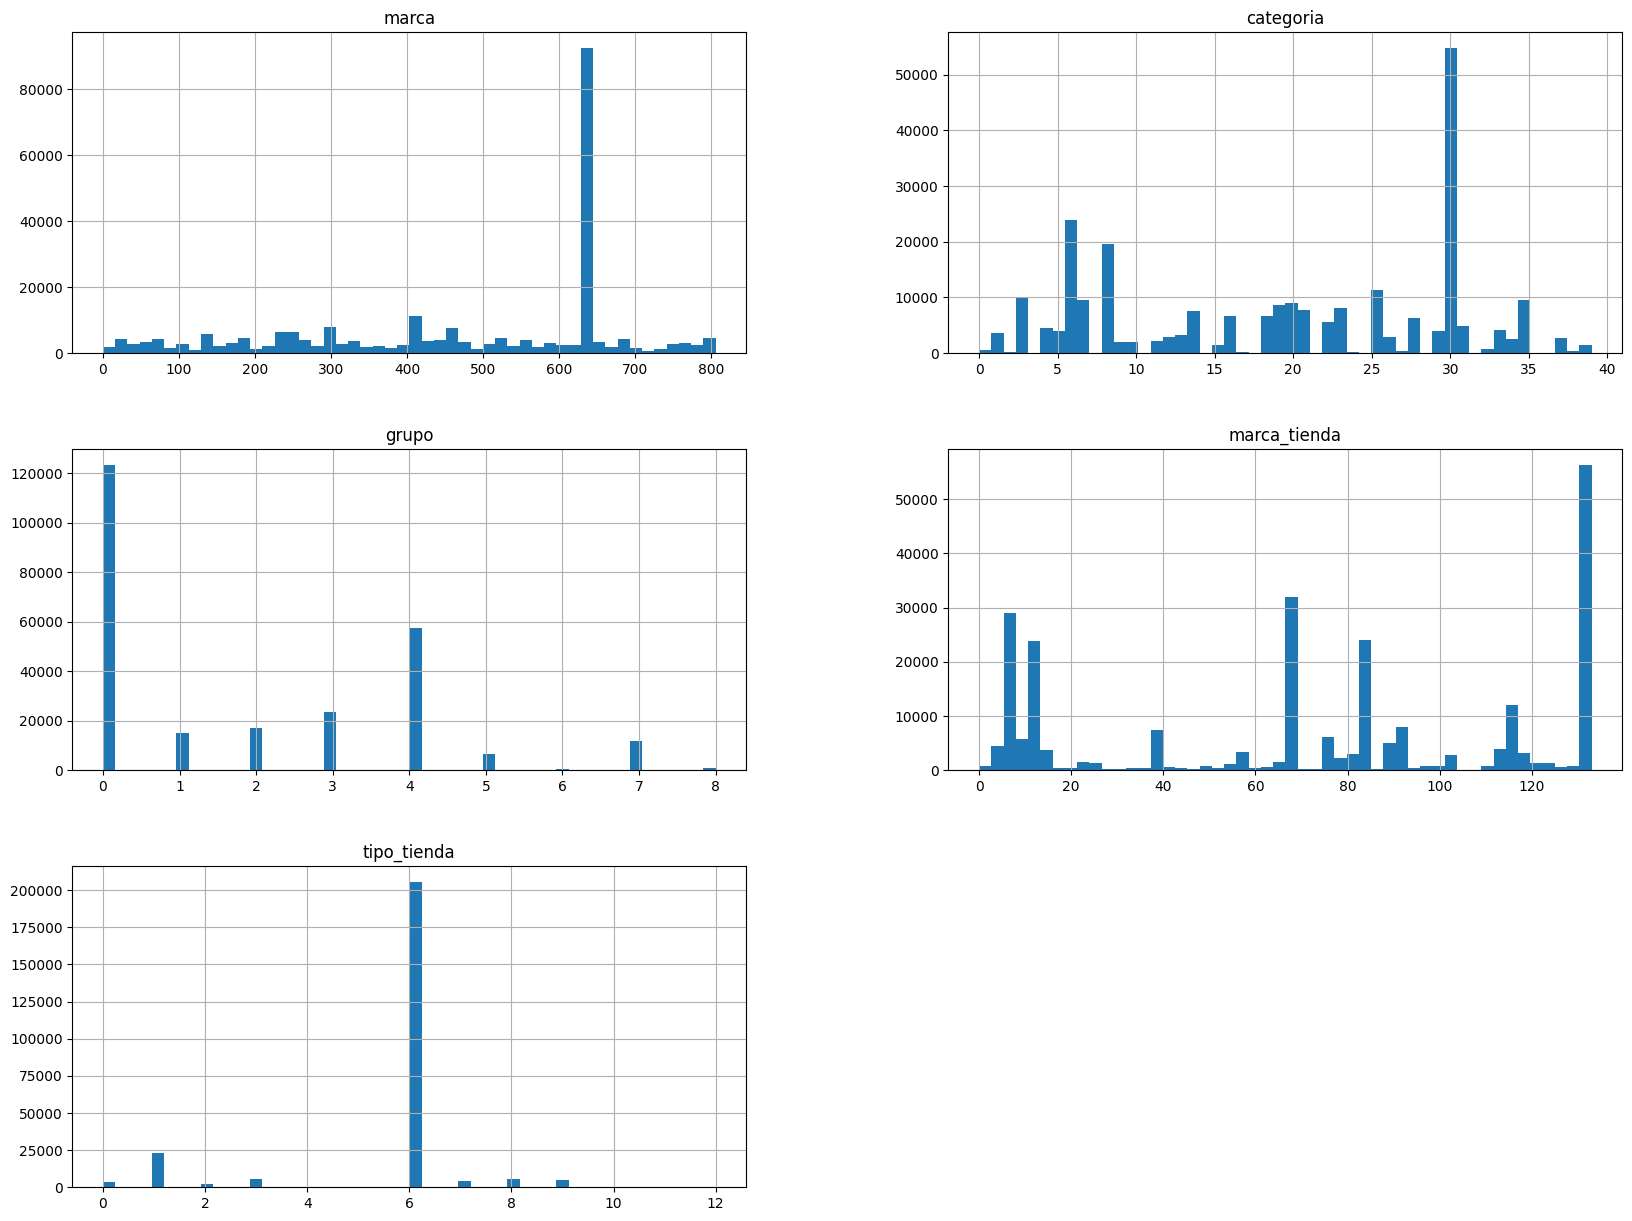

In [ ]:
X.hist(bins=50, figsize=(20, 15));

In [ ]:
X = pd.get_dummies(X)
# df = pd.get_dummies(data=df, columns=['cat_col1','cat_col2'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
y_predict = lr3.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

4.153960155341823e+16

In [ ]:
lr3.score(X_test, y_test)

-2.0635728291236506e+17

In [ ]:
np.sum(cross_val_score(lr3, X, y)) / 5

-1.2574890295283207e+22

El resultado con variables codificadas es negativo, por lo que el modelo de regresion lineal no es capaz de hacer predicciones asertadas

### **Regresion polinomial para variable diferencia_minimo**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
X = df_raw[['producto','presentacion','marca','categoria','grupo','marca_tienda','estado','tipo_tienda','longitud','latitud']]
y = df_raw['diferencia_minimo']

In [ ]:
X.head(3)

producto  presentacion  marca  categoria  grupo  marca_tienda  estado  \
0         2           857      1          1      0            83       0   
1         2           857      1          1      0           131       0   
2         2           857      1          1      0             6       0   

   tipo_tienda    longitud    latitud  
0            6 -102.290779  21.916001  
1            6 -102.297692  21.922922  
2            6 -102.312284  21.886051

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)
print(f"R2 Train: {lr_2.score(X_train_2, y_train)}")
print(f"R2 Test: {lr_2.score(X_test_2, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_2, X_train_2, y_train)) / 5}")

R2 Train: 0.1917864704619726
R2 Test: 0.1921849833967545
Cross Val: 0.19127496420065676


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train)
print(f"R2 Train: {lr_3.score(X_train_3, y_train)}")
print(f"R2 Test: {lr_3.score(X_test_3, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_3, X_train_3, y_train)) / 5}")

R2 Train: 0.2430477167128473
R2 Test: 0.2410216083332517
Cross Val: 0.24059713307117875


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train)
print(f"R2 Train: {lr_4.score(X_train_4, y_train)}")
print(f"R2 Test: {lr_4.score(X_test_4, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_4, X_train_4, y_train)) / 5}")

R2 Train: 0.2899909581533532
R2 Test: 0.27941195952069375
Cross Val: 0.28179948056966514


In [ ]:
poly_5 = PolynomialFeatures(degree=5)
X_train_5 = poly_5.fit_transform(X_train)
X_test_5 = poly_5.fit_transform(X_test)

lr_5 = LinearRegression()
lr_5.fit(X_train_5, y_train)
print(f"R2 Train: {lr_5.score(X_train_5, y_train)}")
print(f"R2 Test: {lr_5.score(X_test_5, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_5, X_train_5, y_train)) / 5}")

#### ***Fallo de memoria agotada en colab al usar 5 grados***

### **Regresion polinomial para variable precio_x**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
X = df_raw[['producto','presentacion','marca','categoria','grupo','marca_tienda','estado','tipo_tienda','longitud','latitud']]
y = df_raw['precio_x']

In [ ]:
X.head(3)

producto  presentacion  marca  categoria  grupo  marca_tienda  estado  \
0         2           857      1          1      0            83       0   
1         2           857      1          1      0           131       0   
2         2           857      1          1      0             6       0   

   tipo_tienda    longitud    latitud  
0            6 -102.290779  21.916001  
1            6 -102.297692  21.922922  
2            6 -102.312284  21.886051

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)
print(f"R2 Train: {lr_2.score(X_train_2, y_train)}")
print(f"R2 Test: {lr_2.score(X_test_2, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_2, X_train_2, y_train)) / 5}")

R2 Train: 0.33563779707634755
R2 Test: 0.3335111597811652
Cross Val: 0.3345176691039514


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train)
print(f"R2 Train: {lr_3.score(X_train_3, y_train)}")
print(f"R2 Test: {lr_3.score(X_test_3, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_3, X_train_3, y_train)) / 5}")

R2 Train: 0.47415842167168953
R2 Test: 0.4741229798384323
Cross Val: 0.47076935418739796


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train)
print(f"R2 Train: {lr_4.score(X_train_4, y_train)}")
print(f"R2 Test: {lr_4.score(X_test_4, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_4, X_train_4, y_train)) / 5}")

R2 Train: 0.57856783612722
R2 Test: 0.5727337092961038
Cross Val: 0.570101274649832


🏠 [Inicio](#celda-contenido)
<a name="celda-redes-neuronales"></a>
# ***Regresión con Redes Neuronales***
---

Se buscó predecir el siguiente valor de la variable precio usando el resto de las variables del data set como entrada.
Se experimentó con el modelo:
 - tf.keras.Sequential

El mejor resultado de R2 fue de .89, con 200 epocas y las siguientes capas:
 - l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
 - l1 = tf.keras.layers.Dense(units=32, activation="relu")
 - l2 = tf.keras.layers.Dense(units=16, activation="relu")
 - l3 = tf.keras.layers.Dense(units=1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df.head(3)

producto           presentacion  marca                          categoria  \
0   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
1   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   
2   ACEITE  BOTELLA 1 LT. VEGETAL  1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES   

     grupo  precio_x       fecha    marca_tienda  \
0  BASICOS      56.0  2022-12-26    MEGA SORIANA   
1  BASICOS      56.0  2022-12-26        WAL-MART   
2  BASICOS      56.5  2022-12-28  BODEGA AURRERA   

                             tipo_tienda  \
0  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
1  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
2  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                          nombre_tienda  \
0  MEGA SORIANA SUCURSAL AGUASCALIENTES   
1       WALMART SUCURSAL PLAZA GALERIAS   
2                        BODEGA AURRERA   

                                           direccion          estado  \
0  AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...  AGUASCALIENTES   
1  INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...  AGUASCALIENTES   
2  CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...  AGUASCALIENTES   

        municipio    latitud    longitud     CP  precio_y  diferencia_minimo  
0  AGUASCALIENTES  21.916001 -102.290779  20116      47.0           1.191489  
1  AGUASCALIENTES  21.922922 -102.297692  20128      47.0           1.191489  
2  AGUASCALIENTES  21.886051 -102.312284  20180      47.0           1.202128

In [ ]:
# eliminar columnas que no se utilizarán en el modelo
df.drop(["fecha","direccion", "precio_y", "diferencia_minimo"], axis="columns", inplace=True)

In [ ]:
# convertir variables categóricas a numéricas
categorical_col = ['producto','presentacion','marca','categoria','grupo','marca_tienda','tipo_tienda','nombre_tienda','estado','municipio','CP']
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) < 55:
    categorical_col.append(column)

In [ ]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [ ]:
df.head(3)

producto  presentacion  marca  categoria  grupo  precio_x  marca_tienda  \
0         2           857      1          1      0      56.0            83   
1         2           857      1          1      0      56.0           131   
2         2           857      1          1      0      56.5             6   

   tipo_tienda  nombre_tienda  estado  municipio    latitud    longitud   CP  
0            6            471       0          1  21.916001 -102.290779  101  
1            6           1192       0          1  21.922922 -102.297692  102  
2            6             28       0          1  21.886051 -102.312284  103

In [ ]:
# escalar valores a 1
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado
df = escalar_a_01(df)

In [ ]:
# Separación de variable dependiente e independientes
X = df.drop("precio_x", axis=1)
y = df['precio_x']

In [ ]:
# Creación de conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Creación de capas de la red neuronal
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=16, activation="relu")
l3 = tf.keras.layers.Dense(units=1)

In [ ]:
# Ensamblado de capas en el modelo
b_model = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history = b_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/10
5031/5031 [==============================] - 12s 2ms/step - loss: 7.5096e-04 - val_loss: 5.4443e-04
Epoch 2/10
5031/5031 [==============================] - 10s 2ms/step - loss: 5.6304e-04 - val_loss: 4.8747e-04
Epoch 3/10
5031/5031 [==============================] - 15s 3ms/step - loss: 5.0428e-04 - val_loss: 4.1432e-04
Epoch 4/10
5031/5031 [==============================] - 10s 2ms/step - loss: 4.7030e-04 - val_loss: 4.7583e-04
Epoch 5/10
5031/5031 [==============================] - 11s 2ms/step - loss: 4.4976e-04 - val_loss: 3.6096e-04
Epoch 6/10
5031/5031 [==============================] - 11s 2ms/step - loss: 4.3171e-04 - val_loss: 3.5802e-04
Epoch 7/10
5031/5031 [==============================] - 12s 2ms/step - loss: 4.1817e-04 - val_loss: 3.3001e-04
Epoch 8/10
5031/5031 [==============================] - 11s 2ms/step - loss: 4.0537e-04 - val_loss: 3.8259e-04
Epoch 9/10
5031/5031 [==============================] - 15s 3ms/step - loss: 3.9662e-04 - val_loss: 3.7318e-04
E

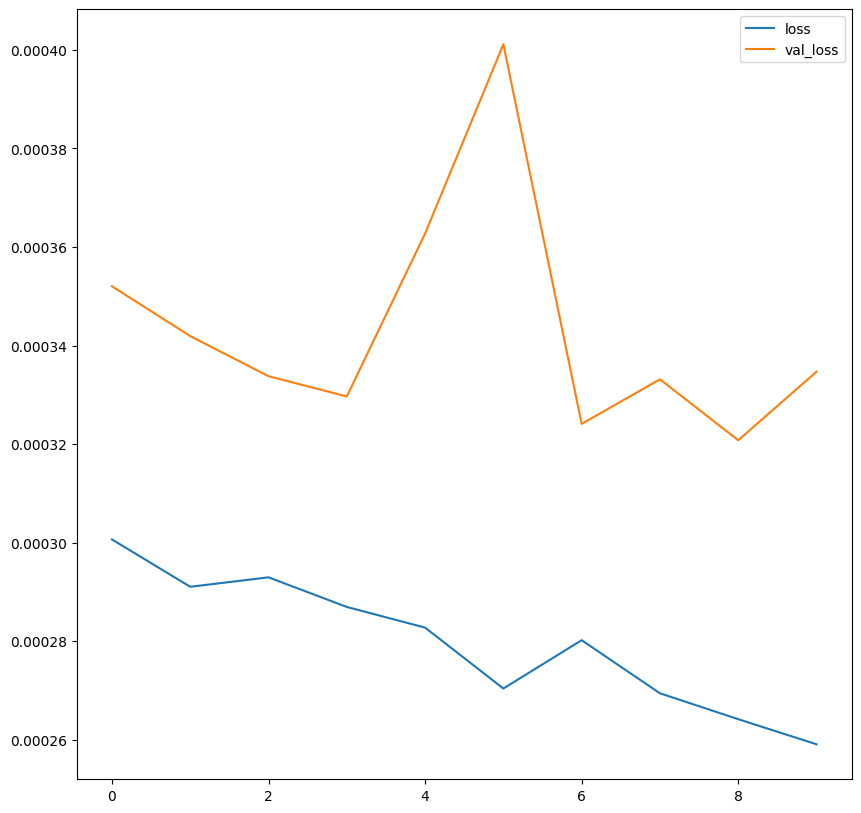

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred = b_model.predict(X_test)

2396/2396 [==============================] - 4s 1ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred)

0.7904174465764224

---

In [ ]:
# 2o Experimento Redes Neuronales: 
#   Mismos parámetros y capas
#   + épocas: 20

In [ ]:
# Ensamblado de capas en el modelo
b_model_20epocas = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_20epocas.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_20epocas = b_model_20epocas.fit(X_train, y_train, epochs=20, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/20
5031/5031 [==============================] - 13s 2ms/step - loss: 3.7966e-04 - val_loss: 3.3606e-04
Epoch 2/20
5031/5031 [==============================] - 11s 2ms/step - loss: 3.6292e-04 - val_loss: 2.9355e-04
Epoch 3/20
5031/5031 [==============================] - 11s 2ms/step - loss: 3.5494e-04 - val_loss: 3.2473e-04
Epoch 4/20
5031/5031 [==============================] - 12s 2ms/step - loss: 3.4309e-04 - val_loss: 3.2873e-04
Epoch 5/20
5031/5031 [==============================] - 10s 2ms/step - loss: 3.4255e-04 - val_loss: 2.8415e-04
Epoch 6/20
5031/5031 [==============================] - 11s 2ms/step - loss: 3.3535e-04 - val_loss: 3.4445e-04
Epoch 7/20
5031/5031 [==============================] - 11s 2ms/step - loss: 3.2588e-04 - val_loss: 2.7688e-04
Epoch 8/20
5031/5031 [==============================] - 11s 2ms/step - loss: 3.2297e-04 - val_loss: 2.8517e-04
Epoch 9/20
5031/5031 [==============================] - 11s 2ms/step - loss: 3.1943e-04 - val_loss: 2.6314e-04
E

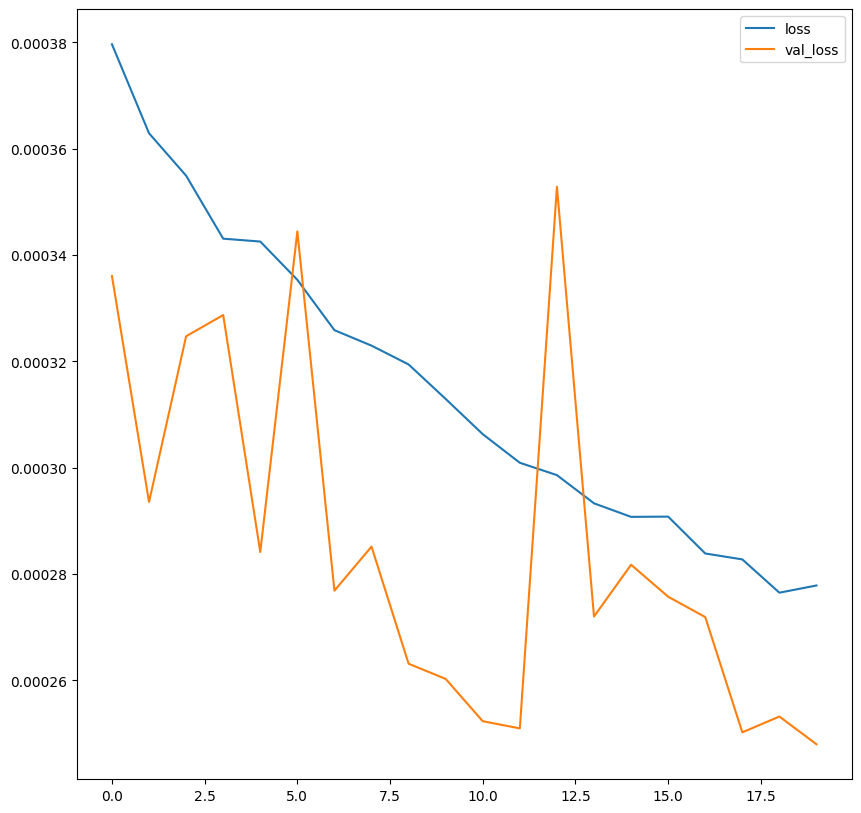

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_20epocas.history["loss"], label="loss")
plt.plot(history_20epocas.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_20epocas = b_model_20epocas.predict(X_test)

2396/2396 [==============================] - 7s 3ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_20epocas)

0.7805925317320402

---

In [ ]:
# 3er Experimento Redes Neuronales: 
#   Mismos parámetros y capas
#   + épocas: 40

In [ ]:
# Ensamblado de capas en el modelo
b_model_40epocas = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_40epocas.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_40epocas = b_model_40epocas.fit(X_train, y_train, epochs=40, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/40
5031/5031 [==============================] - 12s 2ms/step - loss: 2.7439e-04 - val_loss: 2.4462e-04
Epoch 2/40
5031/5031 [==============================] - 11s 2ms/step - loss: 2.7134e-04 - val_loss: 3.7946e-04
Epoch 3/40
5031/5031 [==============================] - 13s 3ms/step - loss: 2.7111e-04 - val_loss: 2.2290e-04
Epoch 4/40
5031/5031 [==============================] - 12s 2ms/step - loss: 2.6424e-04 - val_loss: 2.7885e-04
Epoch 5/40
5031/5031 [==============================] - 12s 2ms/step - loss: 2.5868e-04 - val_loss: 2.2995e-04
Epoch 6/40
5031/5031 [==============================] - 12s 2ms/step - loss: 2.5114e-04 - val_loss: 2.2035e-04
Epoch 7/40
5031/5031 [==============================] - 11s 2ms/step - loss: 2.5025e-04 - val_loss: 2.2838e-04
Epoch 8/40
5031/5031 [==============================] - 11s 2ms/step - loss: 2.4970e-04 - val_loss: 2.0216e-04
Epoch 9/40
5031/5031 [==============================] - 11s 2ms/step - loss: 2.4220e-04 - val_loss: 2.4040e-04
E

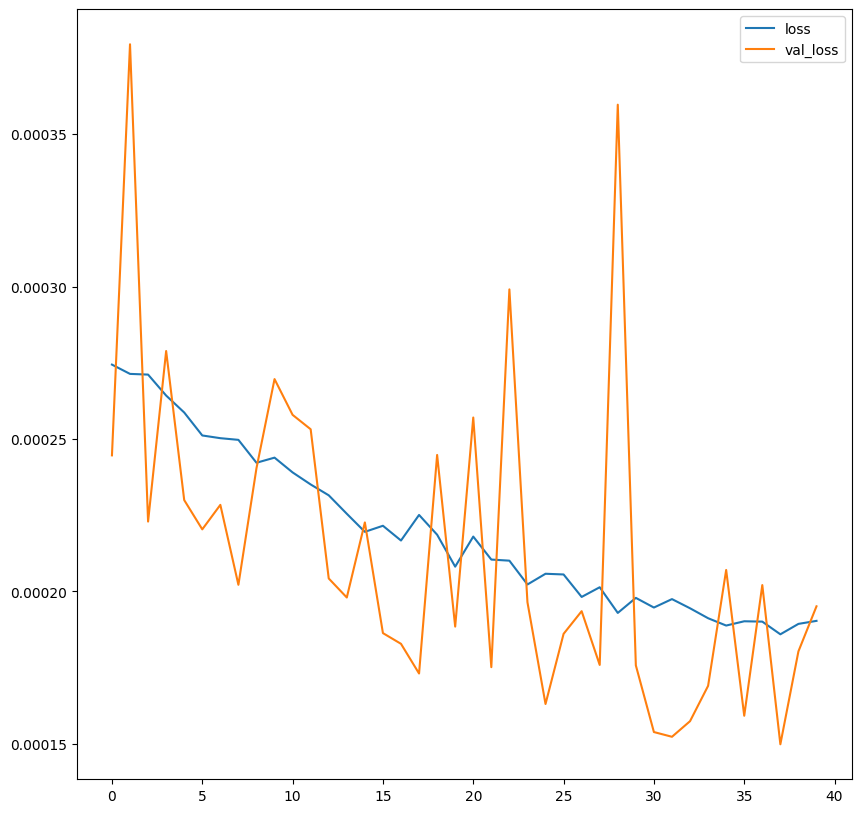

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_40epocas.history["loss"], label="loss")
plt.plot(history_40epocas.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_40epocas = b_model_40epocas.predict(X_test)

2396/2396 [==============================] - 3s 1ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_40epocas)

0.832803011935438

---

In [ ]:
# 4o Experimento Redes Neuronales: 
#   Mismos parámetros y capas
#   + épocas: 100

In [ ]:
# Ensamblado de capas en el modelo
b_model_100epocas = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_100epocas.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_100epocas = b_model_100epocas.fit(X_train, y_train, epochs=100, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/100
5031/5031 [==============================] - 12s 2ms/step - loss: 1.8212e-04 - val_loss: 2.5770e-04
Epoch 2/100
5031/5031 [==============================] - 11s 2ms/step - loss: 1.8145e-04 - val_loss: 1.5730e-04
Epoch 3/100
5031/5031 [==============================] - 11s 2ms/step - loss: 1.7912e-04 - val_loss: 1.3896e-04
Epoch 4/100
5031/5031 [==============================] - 11s 2ms/step - loss: 1.8295e-04 - val_loss: 1.5051e-04
Epoch 5/100
5031/5031 [==============================] - 12s 2ms/step - loss: 1.8044e-04 - val_loss: 1.7917e-04
Epoch 6/100
5031/5031 [==============================] - 13s 3ms/step - loss: 1.7707e-04 - val_loss: 1.7253e-04
Epoch 7/100
5031/5031 [==============================] - 11s 2ms/step - loss: 1.7788e-04 - val_loss: 1.5999e-04
Epoch 8/100
5031/5031 [==============================] - 12s 2ms/step - loss: 1.8160e-04 - val_loss: 1.5858e-04
Epoch 9/100
5031/5031 [==============================] - 13s 3ms/step - loss: 1.8645e-04 - val_loss: 2.0

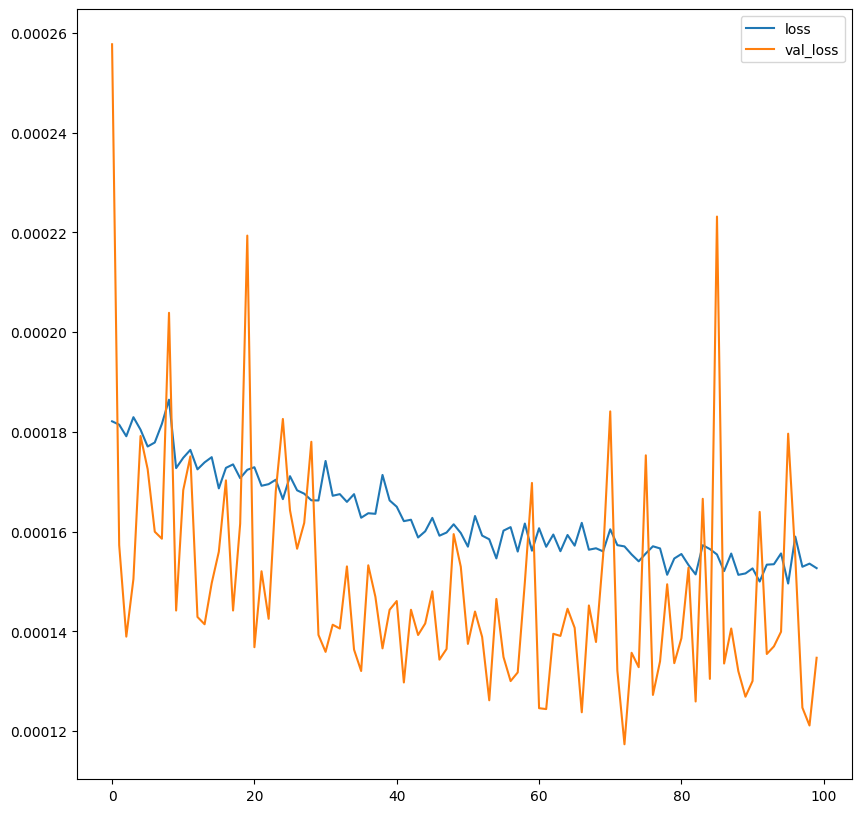

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_100epocas.history["loss"], label="loss")
plt.plot(history_100epocas.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_100epocas = b_model_100epocas.predict(X_test)

2396/2396 [==============================] - 3s 1ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_100epocas)

0.8761995889616678

---

In [ ]:
# 4.1 Experimento Redes Neuronales: 
#   Mismos parámetros y capas
#   + épocas: 500

In [ ]:
# Creación de capas de la red neuronal
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=16, activation="relu")
l3 = tf.keras.layers.Dense(units=1)

In [ ]:
# Ensamblado de capas en el modelo
b_model_500_epocas = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_500_epocas.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_500_epocas = b_model_500_epocas.fit(X_train, y_train, epochs=500, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/500
5031/5031 [==============================] - 13s 2ms/step - loss: 7.8248e-04 - val_loss: 5.7496e-04
Epoch 2/500
5031/5031 [==============================] - 10s 2ms/step - loss: 5.4162e-04 - val_loss: 4.8048e-04
Epoch 3/500
5031/5031 [==============================] - 10s 2ms/step - loss: 4.9819e-04 - val_loss: 3.9715e-04
Epoch 4/500
5031/5031 [==============================] - 9s 2ms/step - loss: 4.7089e-04 - val_loss: 3.8566e-04
Epoch 5/500
5031/5031 [==============================] - 10s 2ms/step - loss: 4.4879e-04 - val_loss: 3.6340e-04
Epoch 6/500
5031/5031 [==============================] - 11s 2ms/step - loss: 4.3306e-04 - val_loss: 3.5063e-04
Epoch 7/500
5031/5031 [==============================] - 10s 2ms/step - loss: 4.1771e-04 - val_loss: 3.4283e-04
Epoch 8/500
5031/5031 [==============================] - 9s 2ms/step - loss: 4.0151e-04 - val_loss: 3.2937e-04
Epoch 9/500
5031/5031 [==============================] - 10s 2ms/step - loss: 3.9570e-04 - val_loss: 3.607

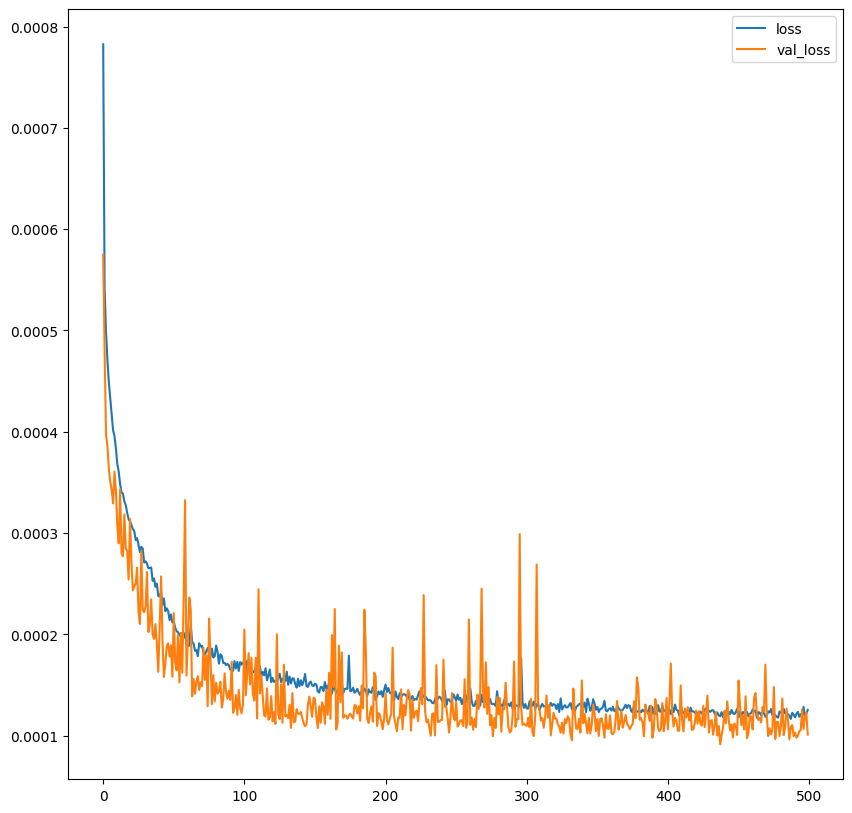

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_500_epocas.history["loss"], label="loss")
plt.plot(history_500_epocas.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_500_epocas = b_model_500_epocas.predict(X_test)

2396/2396 [==============================] - 3s 1ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_500_epocas)

0.886314905838295

---

In [ ]:
# 5o Experimento Redes Neuronales: 
#   Mismos parámetros y capas
#   + épocas: 100

In [ ]:
# Ensamblado de capas en el modelo
b_model_200epocas = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_200epocas.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_200epocas = b_model_200epocas.fit(X_train, y_train, epochs=200, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/200
5031/5031 [==============================] - 11s 2ms/step - loss: 1.5113e-04 - val_loss: 1.2532e-04
Epoch 2/200
5031/5031 [==============================] - 11s 2ms/step - loss: 1.5032e-04 - val_loss: 1.4775e-04
Epoch 3/200
5031/5031 [==============================] - 11s 2ms/step - loss: 1.5217e-04 - val_loss: 1.3434e-04
Epoch 4/200
5031/5031 [==============================] - 12s 2ms/step - loss: 1.5529e-04 - val_loss: 1.7015e-04
Epoch 5/200
5031/5031 [==============================] - 11s 2ms/step - loss: 1.5093e-04 - val_loss: 1.6319e-04
Epoch 6/200
5031/5031 [==============================] - 11s 2ms/step - loss: 1.4671e-04 - val_loss: 1.7275e-04
Epoch 7/200
5031/5031 [==============================] - 10s 2ms/step - loss: 1.4891e-04 - val_loss: 1.2956e-04
Epoch 8/200
5031/5031 [==============================] - 12s 2ms/step - loss: 1.5313e-04 - val_loss: 1.3827e-04
Epoch 9/200
5031/5031 [==============================] - 11s 2ms/step - loss: 1.5209e-04 - val_loss: 1.3

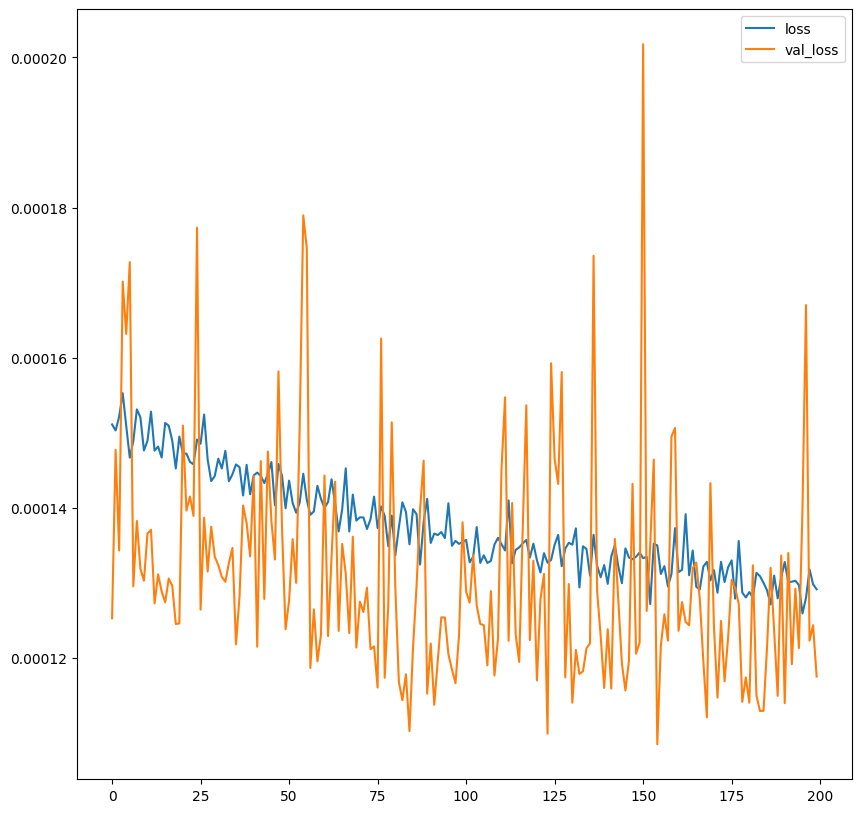

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_200epocas.history["loss"], label="loss")
plt.plot(history_200epocas.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_200epocas = b_model_200epocas.predict(X_test)

2396/2396 [==============================] - 4s 2ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_200epocas)

0.8922345087648953

---

In [ ]:
# 6o Experimento:
#  mismas capas, doble neuronas
#  50 epocas

In [ ]:
# Creación de capas de la red neuronal
l0 = tf.keras.layers.Dense(units=128, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=64, activation="relu")
l2 = tf.keras.layers.Dense(units=32, activation="relu")
l3 = tf.keras.layers.Dense(units=1)

In [ ]:
# Ensamblado de capas en el modelo
b_model_50epocas_neuron_plus = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_50epocas_neuron_plus.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_50epocas_neuron_plus = b_model_50epocas_neuron_plus.fit(X_train, y_train, epochs=50, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/50
5031/5031 [==============================] - 17s 3ms/step - loss: 6.9727e-04 - val_loss: 5.4390e-04
Epoch 2/50
5031/5031 [==============================] - 17s 3ms/step - loss: 5.0941e-04 - val_loss: 3.8670e-04
Epoch 3/50
5031/5031 [==============================] - 17s 3ms/step - loss: 4.7114e-04 - val_loss: 3.5569e-04
Epoch 4/50
5031/5031 [==============================] - 19s 4ms/step - loss: 4.5058e-04 - val_loss: 4.8650e-04
Epoch 5/50
5031/5031 [==============================] - 12s 2ms/step - loss: 4.3152e-04 - val_loss: 3.5662e-04
Epoch 6/50
5031/5031 [==============================] - 12s 2ms/step - loss: 4.2035e-04 - val_loss: 3.2669e-04
Epoch 7/50
5031/5031 [==============================] - 12s 2ms/step - loss: 4.0409e-04 - val_loss: 3.3521e-04
Epoch 8/50
5031/5031 [==============================] - 12s 2ms/step - loss: 3.9373e-04 - val_loss: 3.2082e-04
Epoch 9/50
5031/5031 [==============================] - 12s 2ms/step - loss: 3.8554e-04 - val_loss: 3.3638e-04
E

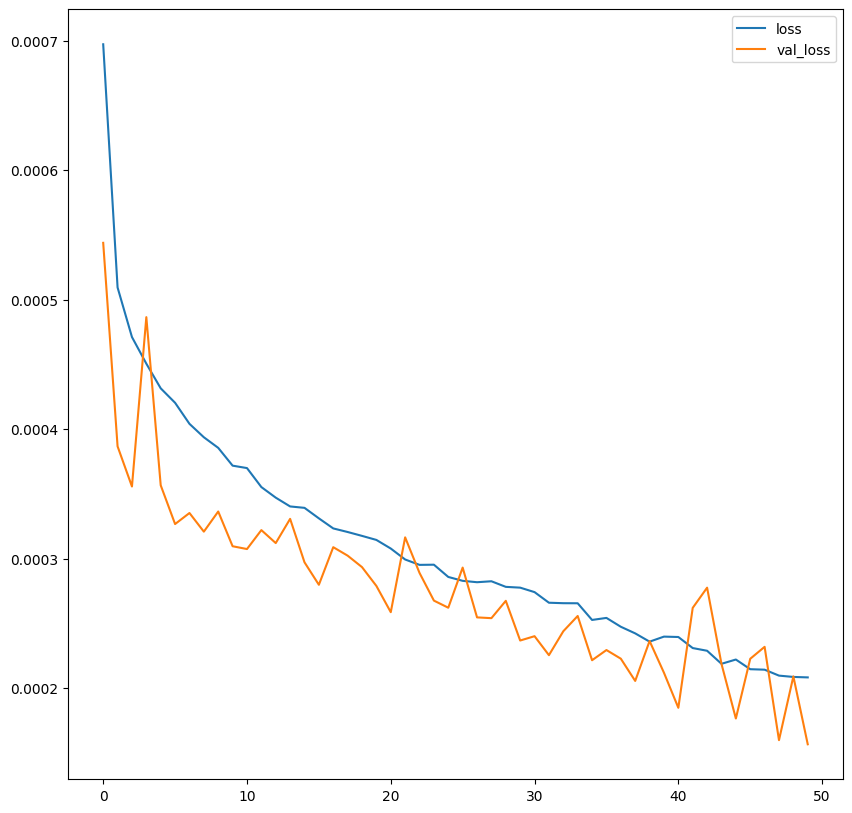

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_50epocas_neuron_plus.history["loss"], label="loss")
plt.plot(history_50epocas_neuron_plus.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_50epocas_neuron_plus = b_model_50epocas_neuron_plus.predict(X_test)

2396/2396 [==============================] - 8s 3ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_50epocas_neuron_plus)

0.8481641729632012

---

In [ ]:
# 7o Experimento:
#  mismas capas y neuronas del experimento 6
#  150 epocas


In [ ]:
# Creación de capas de la red neuronal
l0 = tf.keras.layers.Dense(units=128, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=64, activation="relu")
l2 = tf.keras.layers.Dense(units=32, activation="relu")
l3 = tf.keras.layers.Dense(units=1)

In [ ]:
# Ensamblado de capas en el modelo
b_model_150epocas_neuron_pl = tf.keras.Sequential([l0, l1, l2, l3])

In [ ]:
# Compilación del modelo
b_model_150epocas_neuron_pl.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Entrenamiento del modelo
history_150epocas_neuron_pl = b_model_150epocas_neuron_pl.fit(X_train, y_train, epochs=150, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/150
5031/5031 [==============================] - 13s 2ms/step - loss: 2.3722e-04 - val_loss: 1.9703e-04
Epoch 2/150
5031/5031 [==============================] - 11s 2ms/step - loss: 2.4627e-04 - val_loss: 2.2520e-04
Epoch 3/150
5031/5031 [==============================] - 12s 2ms/step - loss: 2.3902e-04 - val_loss: 1.8797e-04
Epoch 4/150
5031/5031 [==============================] - 12s 2ms/step - loss: 2.2714e-04 - val_loss: 1.8760e-04
Epoch 5/150
5031/5031 [==============================] - 11s 2ms/step - loss: 2.3183e-04 - val_loss: 1.9790e-04
Epoch 6/150
5031/5031 [==============================] - 12s 2ms/step - loss: 2.2695e-04 - val_loss: 2.1956e-04
Epoch 7/150
5031/5031 [==============================] - 12s 2ms/step - loss: 2.2731e-04 - val_loss: 1.9625e-04
Epoch 8/150
5031/5031 [==============================] - 12s 2ms/step - loss: 2.2277e-04 - val_loss: 2.1833e-04
Epoch 9/150
5031/5031 [==============================] - 13s 3ms/step - loss: 2.2240e-04 - val_loss: 1.8

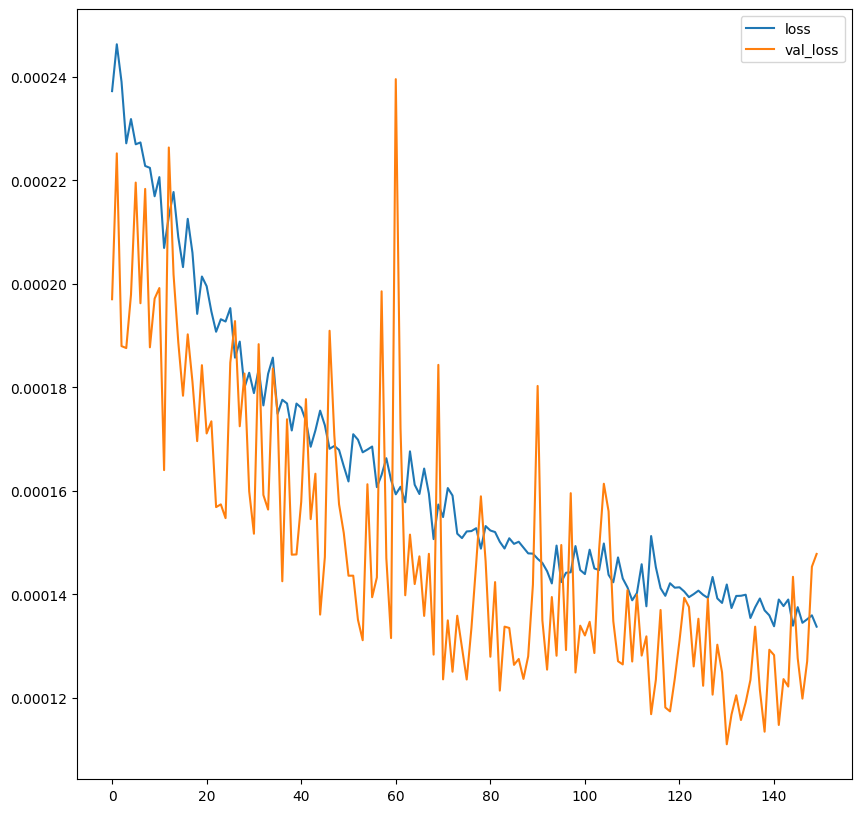

In [ ]:
# Revisión de desempeño
# Gráfica de error de predicción
fig = plt.figure(figsize=(10, 10))

plt.plot(history_150epocas_neuron_pl.history["loss"], label="loss")
plt.plot(history_150epocas_neuron_pl.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [ ]:
# Cálculo de predicciones
y_pred_150epocas_neuron_pl = b_model_150epocas_neuron_pl.predict(X_test)

2396/2396 [==============================] - 3s 1ms/step


In [ ]:
# Revisión de desempeño
# R2
r2_score(y_test, y_pred_150epocas_neuron_pl)

0.8560701040407732

🏠 [Inicio](#celda-contenido)
<a name="celda-series-tiempo"></a>
# ***Modelos de Regresión con Series de Tiempo***
Se buscó predecir el siguiente valor de la variable precio pero sin usar las variables categóricas, únicamente usando el valor anterior de la variable precio como entrada.

Se siguió un [artículo](https://www.datasciencewithmarco.com/blog/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy) donde se muestra si algunos modelos de regresión pueden mejorar las predicciones comparados con una base simple: asumir que el siguiente precio será igual al anterior. 

Los modelos que se incluyeron en la comparación son:
 - DecisionTreeRegressor
 - GradientBoostingRegressor

Para la comparación se utilizó una medida de desempeño de porcentaje de error promedio (MAPE, Mean Absolute Percentage Error)

**Resultado**

 - Se encontró que estos dos modelos de regresión pueden mejorar al desempeño base cuando predicen varios periodos hacia adelante en el tiempo y tomando en cuenta varios periodos hacia atrás como entrenamiento.

- Para predecir un período hacia adelante, considerando sólo el período anterior, el modelo base es mejor que estos modelos de machine learning.

---
Para adaptar los data set que publica PROFECO, se desarrolló una utilería en python para generar data sets de precios a lo largo del tiempo para un producto-presentacion-marca en un municipio en particular. [Ver aquí](https://github.com/adavals/bedu-datascience-f3m2/blob/e0555f1332bfc73040153d0dedb9818acdf90c01/src/SupportDS.py)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# 8 años
# df_raw = pd.read_csv('https://raw.githubusercontent.com/adavals/bedu-datascience-f3m2/main/dat/QQP_QQP_2015_2022_ACEITE_1LT_NUTRIOLI_WALMART_GAM.csv',index_col=0)

# 2 años
df_raw = pd.read_csv('https://raw.githubusercontent.com/adavals/bedu-datascience-f3m2/main/dat/QQP_2021_2022_ACEITE_1LT_NUTRIOLI_WALMART_GAM.csv',index_col=0)

In [ ]:
# df_raw = df_raw.iloc[1:] elimina el primer renglón
df_raw.head()

precio  diferencia_minimo
fecha                                
2021-01-08    29.9           1.200803
2021-01-15    29.9           1.196000
2021-01-22    32.0           1.254902
2021-01-29    32.0           1.254902
2021-02-05    32.0           1.285141

In [ ]:
df_raw.shape

(105, 2)

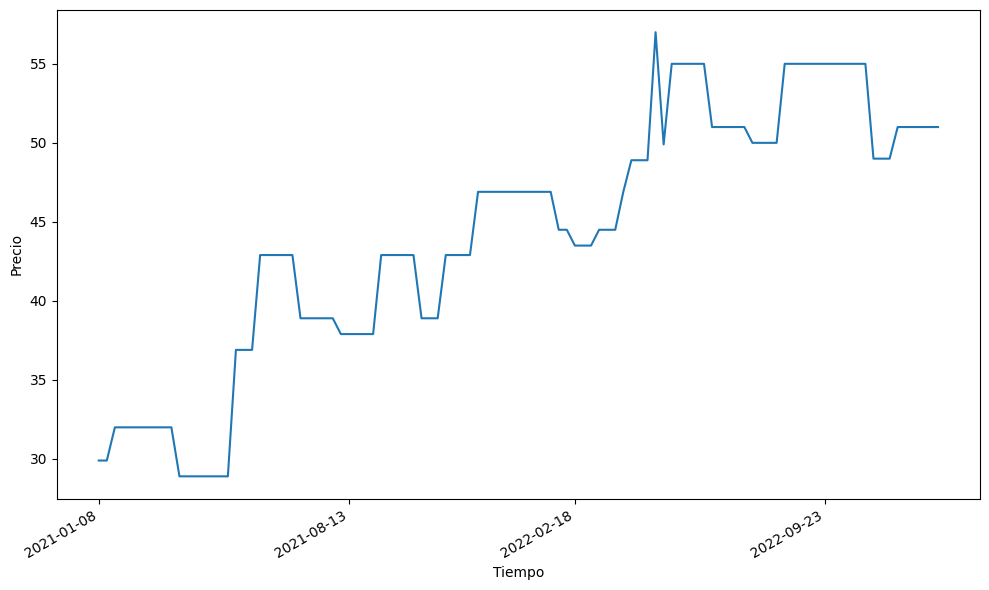

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_raw['precio'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Precio')
months = mdates.MonthLocator()  # every mont
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
# Formateo del dataset de manera que la observación actual es la variable independiente para predecir la siguiente observación (objetivo, y)

In [ ]:
df = df_raw.copy()
df['y'] = df['precio'].shift(-1)
df.drop(columns='diferencia_minimo', inplace=True)
df.head()

precio     y
fecha                   
2021-01-08    29.9  29.9
2021-01-15    29.9  32.0
2021-01-22    32.0  32.0
2021-01-29    32.0  32.0
2021-02-05    32.0  32.0

In [ ]:
df.tail()

precio     y
fecha                   
2022-12-02    51.0  51.0
2022-12-09    51.0  51.0
2022-12-16    51.0  51.0
2022-12-23    51.0  51.0
2022-12-30    51.0   NaN

In [ ]:
# separación de dataset en entrenamiento y prueba
train = df[:-52]
test = df[-52:]
test = test.drop(test.tail(1).index) # Quitar última fila
test.tail()

precio     y
fecha                   
2022-11-25    51.0  51.0
2022-12-02    51.0  51.0
2022-12-09    51.0  51.0
2022-12-16    51.0  51.0
2022-12-23    51.0  51.0

In [ ]:
# Crear una base para saber si usar machine learning es mejor que simplemente asumir que la siguiente observación será igual que la anterior
test = test.copy()
test['baseline_pred'] = test['precio']
test.head()

precio     y  baseline_pred
fecha                                  
2022-01-07    46.9  46.9           46.9
2022-01-14    46.9  46.9           46.9
2022-01-21    46.9  46.9           46.9
2022-01-28    46.9  44.5           46.9
2022-02-04    44.5  44.5           44.5

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train = train['precio'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['precio'].values.reshape(-1,1)

In [ ]:
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)

In [ ]:
# Fit the model
dt_reg.fit(X=X_train, y=y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
dt_pred = dt_reg.predict(X_test)

In [ ]:
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)

In [ ]:
gbr.fit(X_train, y=y_train.ravel())

GradientBoostingRegressor(random_state=42)

In [ ]:
gbr_pred = gbr.predict(X_test)

In [ ]:
test['gbr_pred'] = gbr_pred

In [ ]:
test.head()

precio     y  baseline_pred    dt_pred   gbr_pred
fecha                                                        
2022-01-07    46.9  46.9           46.9  46.900000  46.899771
2022-01-14    46.9  46.9           46.9  46.900000  46.899771
2022-01-21    46.9  46.9           46.9  46.900000  46.899771
2022-01-28    46.9  44.5           46.9  46.900000  46.899771
2022-02-04    44.5  44.5           44.5  42.614286  42.614170

Here, we use the mean absolute percentage error (MAPE). It is an especially informative error metric, as it return a percentage, which is easy to interpret. Make sure to only apply it when you don’t have values close to 0

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

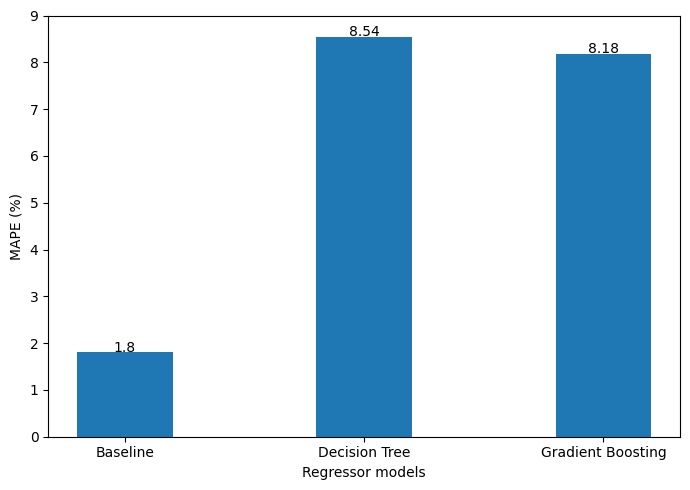

In [ ]:
baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['precio'], test['gbr_pred'])
# Generate bar plot
fig, ax = plt.subplots(figsize=(7, 5))
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 9.0)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')
    
plt.tight_layout()

Predict the next time step using a sequence of past observations

In [ ]:
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['precio'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['precio'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [ ]:
new_df = window_input(5, df_raw)
new_df.drop(columns=['diferencia_minimo'], inplace=True)

In [ ]:
new_df.head()

precio   x_1   x_2   x_3   x_4     y
fecha                                           
2021-01-08    29.9  29.9  32.0  32.0  32.0  32.0
2021-01-15    29.9  32.0  32.0  32.0  32.0  32.0
2021-01-22    32.0  32.0  32.0  32.0  32.0  32.0
2021-01-29    32.0  32.0  32.0  32.0  32.0  32.0
2021-02-05    32.0  32.0  32.0  32.0  32.0  32.0

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df[['precio', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [ ]:
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

In [ ]:
dt_reg_5 = DecisionTreeRegressor(random_state=42)

dt_reg_5.fit(X_train, y_train)

dt_reg_5_pred = dt_reg_5.predict(X_test)

In [ ]:
gbr_5 = GradientBoostingRegressor(random_state=42)

gbr_5.fit(X_train, y_train.ravel())

gbr_5_pred = gbr_5.predict(X_test)

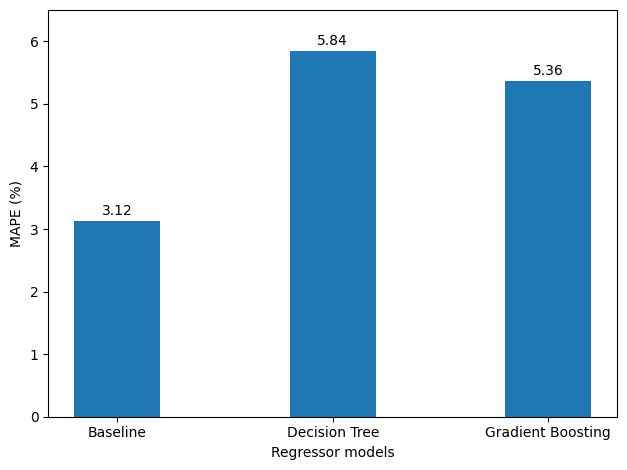

In [ ]:
baseline_mape = mape(y_test, baseline_pred)
dt_5_mape = mape(y_test, dt_reg_5_pred)
gbr_5_mape = mape(y_test, gbr_5_pred)
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_5_mape, gbr_5_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 6.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')
    
plt.tight_layout()

Predict a sequence of future time steps using a sequence of past observations

Here, we will use a sequence of 26 observations to predict the next 26 time steps. In other words, we input half of a year to predict the next half. Note that the input and output sequences do not need to have the same length. This is an arbitrary decision on my end.

In [ ]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < input_length:
        df[f'x_{i}'] = df['precio'].shift(-i)
        i = i + 1
        
    j = 0
    while j < output_length:
        df[f'y_{j}'] = df['precio'].shift(-output_length-j)
        j = j + 1
        
    df = df.dropna(axis=0)
    
    return df

In [ ]:
seq_df = window_input_output(26, 26, df_raw)
seq_df.drop(columns=['diferencia_minimo'], inplace=True)
seq_df.head()

precio   x_1   x_2   x_3   x_4   x_5   x_6   x_7   x_8   x_9  ...  \
fecha                                                                     ...   
2021-01-08    29.9  29.9  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  ...   
2021-01-15    29.9  32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  28.9  ...   
2021-01-22    32.0  32.0  32.0  32.0  32.0  32.0  32.0  32.0  28.9  28.9  ...   
2021-01-29    32.0  32.0  32.0  32.0  32.0  32.0  32.0  28.9  28.9  28.9  ...   
2021-02-05    32.0  32.0  32.0  32.0  32.0  32.0  28.9  28.9  28.9  28.9  ...   

            y_16  y_17  y_18  y_19  y_20  y_21  y_22  y_23  y_24  y_25  
fecha                                                                   
2021-01-08  38.9  42.9  42.9  42.9  42.9  46.9  46.9  46.9  46.9  46.9  
2021-01-15  42.9  42.9  42.9  42.9  46.9  46.9  46.9  46.9  46.9  46.9  
2021-01-22  42.9  42.9  42.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  
2021-01-29  42.9  42.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  
2021-02-05  42.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  46.9  

[5 rows x 52 columns]

In [ ]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]

X_cols.insert(0, 'precio')

y_cols = [col for col in seq_df.columns if col.startswith('y')]
X_train = seq_df[X_cols][:-2].values
y_train = seq_df[y_cols][:-2].values

X_test = seq_df[X_cols][-2:].values
y_test = seq_df[y_cols][-2:].values

In [ ]:
dt_seq = DecisionTreeRegressor(random_state=42)

dt_seq.fit(X_train, y_train)

dt_seq_preds = dt_seq.predict(X_test)

In [ ]:
from sklearn.multioutput import RegressorChain

gbr_seq = GradientBoostingRegressor(random_state=42)

chained_gbr = RegressorChain(gbr_seq)

chained_gbr.fit(X_train, y_train)

gbr_seq_preds = chained_gbr.predict(X_test)

In [ ]:
mape_dt_seq = mape(dt_seq_preds.reshape(1, -1), y_test.reshape(1, -1))
mape_gbr_seq = mape(gbr_seq_preds.reshape(1, -1), y_test.reshape(1, -1))
mape_baseline = mape(X_test.reshape(1, -1), y_test.reshape(1, -1))

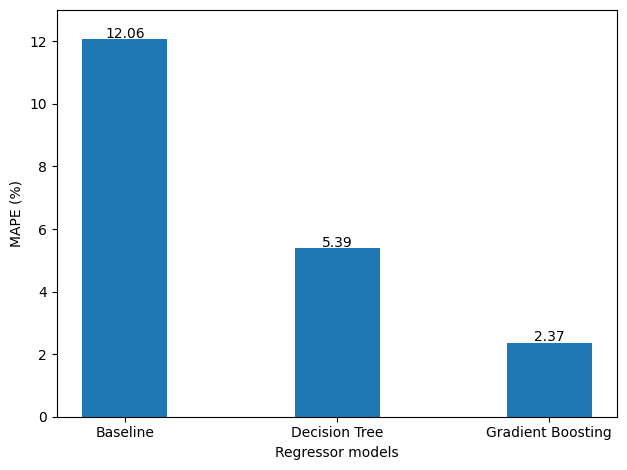

In [ ]:
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [mape_baseline, mape_dt_seq, mape_gbr_seq]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 13)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

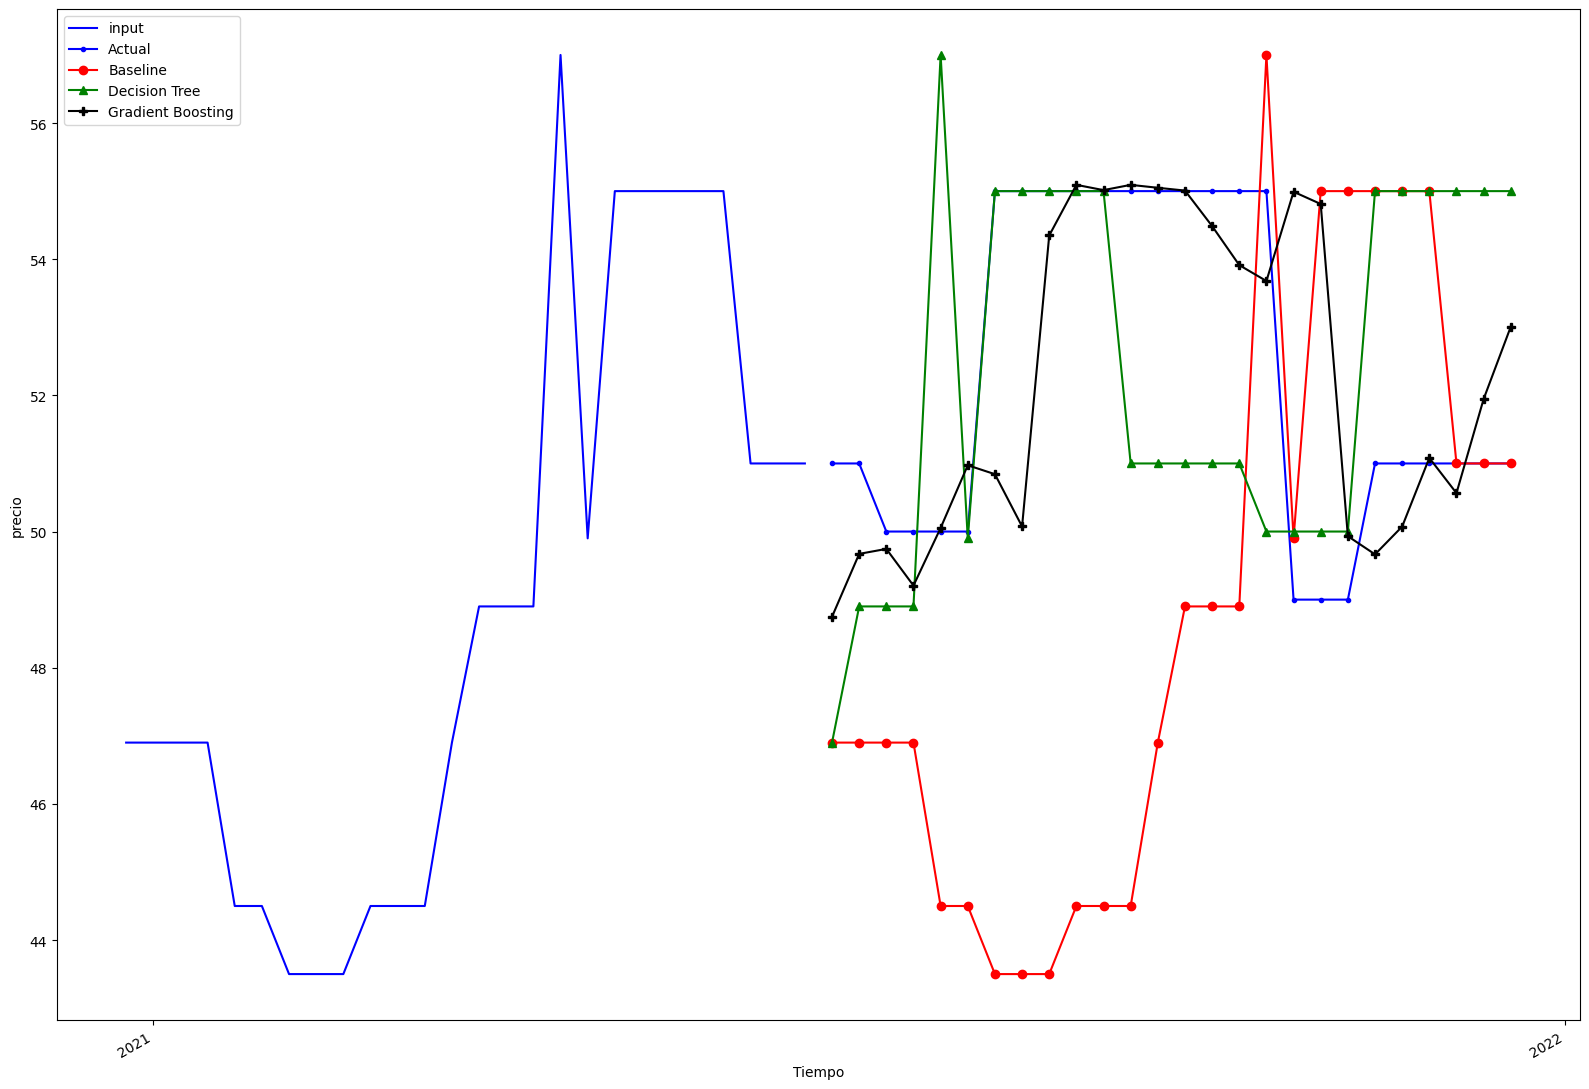

In [ ]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(np.arange(0, 26, 1), X_test[1], 'b-', label='input')
ax.plot(np.arange(26, 52, 1), y_test[1], marker='.', color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), X_test[1], marker='o', color='red', label='Baseline')
ax.plot(np.arange(26, 52, 1), dt_seq_preds[1], marker='^', color='green', label='Decision Tree')
ax.plot(np.arange(26, 52, 1), gbr_seq_preds[1], marker='P', color='black', label='Gradient Boosting')
ax.set_xlabel('Tiempo')
ax.set_ylabel('precio')
plt.xticks(np.arange(1, 104, 52), np.arange(2021, 2023, 1))
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()

🏠 [Inicio](#celda-contenido)
<a name="celda-redes-neuronales-series-tiempo"></a>
# ***Regresión con redes neuronales y series de tiempo***
Se buscó determinar si algún modelo de redes neuronales puede ser mejor que el desempeño base para predecir el siguiente precio, usando sólo el precio anterior como entrada.

Se siguió el artículo: [Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/), utilizando el mismo data set de precios de un producto-presentacion-marca con dos años de información de la sección anterior.

**Resultado**

Se encontró que este modelo de red neuronal si puede predecir mejor (1.4% error promedio) que el desempeño base (1.8% error promedio). 

Fue necesario ajustar algunos parámetros, como incrementar el número de "neuronas" al inicio y desactivar el desordenamiento de los datos (Shuffle=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# set seed for reproducibility purposes
tf.random.set_seed(7)

In [ ]:
# dataset of a product, presentation, brand, store brand and municipality for 2 years, weekly frequency
dataframe = pd.read_csv('https://raw.githubusercontent.com/adavals/bedu-datascience-f3m2/main/dat/QQP_2021_2022_ACEITE_1LT_NUTRIOLI_WALMART_GAM.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.shape

(105, 1)

In [ ]:
dataframe.head()

precio
0    29.9
1    29.9
2    32.0
3    32.0
4    32.0

In [ ]:
dataset[:5]   

array([[29.9],
       [29.9],
       [32. ],
       [32. ],
       [32. ]], dtype=float32)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

70 35


In [ ]:
# convert an array of values into a dataset matrix setting the look_back number of periods as features to predict
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1  # number of periods to use as features to predict
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(68, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX[:5]

array([[[0.03558719]],

       [[0.03558719]],

       [[0.11032033]],

       [[0.11032033]],

       [[0.11032033]]], dtype=float32)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
68/68 - 1s - loss: 0.1345 - 1s/epoch - 21ms/step
Epoch 2/100
68/68 - 0s - loss: 0.0750 - 84ms/epoch - 1ms/step
Epoch 3/100
68/68 - 0s - loss: 0.0415 - 92ms/epoch - 1ms/step
Epoch 4/100
68/68 - 0s - loss: 0.0267 - 86ms/epoch - 1ms/step
Epoch 5/100
68/68 - 0s - loss: 0.0210 - 103ms/epoch - 2ms/step
Epoch 6/100
68/68 - 0s - loss: 0.0186 - 92ms/epoch - 1ms/step
Epoch 7/100
68/68 - 0s - loss: 0.0173 - 93ms/epoch - 1ms/step
Epoch 8/100
68/68 - 0s - loss: 0.0159 - 83ms/epoch - 1ms/step
Epoch 9/100
68/68 - 0s - loss: 0.0146 - 88ms/epoch - 1ms/step
Epoch 10/100
68/68 - 0s - loss: 0.0133 - 83ms/epoch - 1ms/step
Epoch 11/100
68/68 - 0s - loss: 0.0122 - 82ms/epoch - 1ms/step
Epoch 12/100
68/68 - 0s - loss: 0.0109 - 89ms/epoch - 1ms/step
Epoch 13/100
68/68 - 0s - loss: 0.0099 - 84ms/epoch - 1ms/step
Epoch 14/100
68/68 - 0s - loss: 0.0089 - 82ms/epoch - 1ms/step
Epoch 15/100
68/68 - 0s - loss: 0.0081 - 83ms/epoch - 1ms/step
Epoch 16/100
68/68 - 0s - loss: 0.0072 - 81ms/epoch - 1ms/step
E

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 6ms/step
Train Score: 1.77 RMSE
Test Score: 2.12 RMSE


Error cuadrático medio (RMSE)
Como la raíz cuadrada de una varianza, RMSE se puede interpretar como la desviación estándar de la varianza inexplicada, y tiene la propiedad útil de estar en las mismas unidades que la variable de respuesta. Los valores más bajos de RMSE indican un mejor ajuste.
Los valores más bajos de RMSE indican un mejor ajuste. RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.

https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/#:~:text=Error%20cuadr%C3%A1tico%20medio%20(RMSE),-La%20m%C3%A9trica%20m%C3%A1s&text=Como%20la%20ra%C3%ADz%20cuadrada%20de,RMSE%20indican%20un%20mejor%20ajuste.

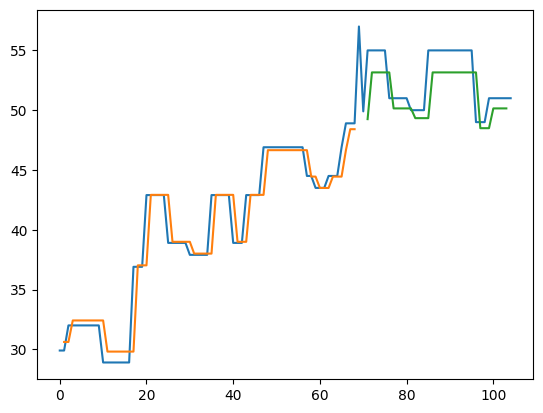

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

---
Experimento con data set de 8 años

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# set seed for reproducibility purposes
tf.random.set_seed(7)

In [ ]:
# dataset of a product, presentation, brand, store brand and municipality for 2 years, weekly frequency
dataframe = pd.read_csv('https://raw.githubusercontent.com/adavals/bedu-datascience-f3m2/main/dat/QQP_QQP_2015_2022_ACEITE_1LT_NUTRIOLI_WALMART_GAM.csv', usecols=[1])
dataframe.head()

precio
0     0.0
1    25.9
2    26.9
3    26.9
4    26.9

In [ ]:
# drop first row
dataframe = dataframe.iloc[1:]
dataframe.head()

precio
1    25.9
2    26.9
3    26.9
4    26.9
5    26.9

In [ ]:
# convert to array
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.shape

(416, 1)

In [ ]:
dataset[:5]   

array([[25.9],
       [26.9],
       [26.9],
       [26.9],
       [26.9]], dtype=float32)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

278 138


In [ ]:
# convert an array of values into a dataset matrix setting the look_back number of periods as features to predict
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1  # number of periods to use as features to predict
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(276, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX[:5]

array([[[0.13850415]],

       [[0.16620499]],

       [[0.16620499]],

       [[0.16620499]],

       [[0.16620499]]], dtype=float32)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
276/276 - 2s - loss: 0.0058 - 2s/epoch - 9ms/step
Epoch 2/200
276/276 - 0s - loss: 0.0027 - 485ms/epoch - 2ms/step
Epoch 3/200
276/276 - 0s - loss: 0.0025 - 485ms/epoch - 2ms/step
Epoch 4/200
276/276 - 0s - loss: 0.0023 - 470ms/epoch - 2ms/step
Epoch 5/200
276/276 - 0s - loss: 0.0020 - 490ms/epoch - 2ms/step
Epoch 6/200
276/276 - 0s - loss: 0.0018 - 461ms/epoch - 2ms/step
Epoch 7/200
276/276 - 0s - loss: 0.0016 - 491ms/epoch - 2ms/step
Epoch 8/200
276/276 - 0s - loss: 0.0015 - 445ms/epoch - 2ms/step
Epoch 9/200
276/276 - 0s - loss: 0.0014 - 462ms/epoch - 2ms/step
Epoch 10/200
276/276 - 1s - loss: 0.0014 - 643ms/epoch - 2ms/step
Epoch 11/200
276/276 - 1s - loss: 0.0014 - 685ms/epoch - 2ms/step
Epoch 12/200
276/276 - 1s - loss: 0.0013 - 696ms/epoch - 3ms/step
Epoch 13/200
276/276 - 1s - loss: 0.0013 - 699ms/epoch - 3ms/step
Epoch 14/200
276/276 - 1s - loss: 0.0013 - 517ms/epoch - 2ms/step
Epoch 15/200
276/276 - 0s - loss: 0.0013 - 461ms/epoch - 2ms/step
Epoch 16/200
276/276 -

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

5/5 [==============================] - 0s 3ms/step
Train Score: 1.28 RMSE
Test Score: 2.55 RMSE


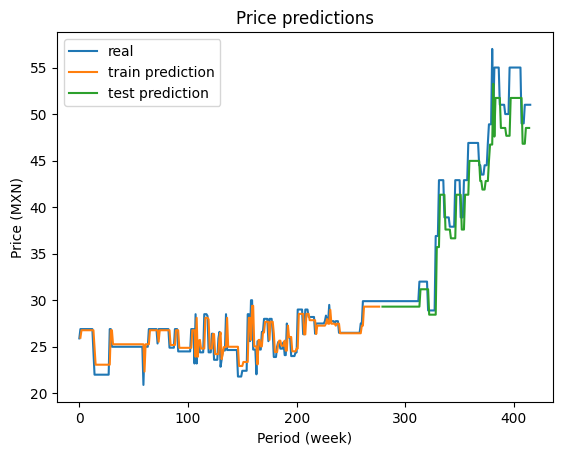

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real')
plt.plot(trainPredictPlot, label='train prediction')
plt.plot(testPredictPlot, label='test prediction')
plt.legend(loc="upper left")
plt.title("Price predictions")
plt.xlabel("Period (week)")
plt.ylabel("Price (MXN)")
plt.show()

** NOTA

No predice mejor por tener más datos (más de dos años) al parecer predice mejor al entrenar por más epocas

** por comprobar

---
Experimento 3:

- 2 años 
- 200 epocas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# set seed for reproducibility purposes
tf.random.set_seed(7)

In [ ]:
# dataset of a product, presentation, brand, store brand and municipality for 2 years, weekly frequency
dataframe = pd.read_csv('https://raw.githubusercontent.com/adavals/bedu-datascience-f3m2/main/dat/QQP_2021_2022_ACEITE_1LT_NUTRIOLI_WALMART_GAM.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.shape

(105, 1)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

70 35


In [ ]:
# convert an array of values into a dataset matrix setting the look_back number of periods as features to predict
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1  # number of periods to use as features to predict
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(68, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX[:5]

array([[[0.03558719]],

       [[0.03558719]],

       [[0.11032033]],

       [[0.11032033]],

       [[0.11032033]]], dtype=float32)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
68/68 - 2s - loss: 0.1844 - 2s/epoch - 32ms/step
Epoch 2/200
68/68 - 0s - loss: 0.1159 - 135ms/epoch - 2ms/step
Epoch 3/200
68/68 - 0s - loss: 0.0720 - 146ms/epoch - 2ms/step
Epoch 4/200
68/68 - 0s - loss: 0.0482 - 150ms/epoch - 2ms/step
Epoch 5/200
68/68 - 0s - loss: 0.0373 - 165ms/epoch - 2ms/step
Epoch 6/200
68/68 - 0s - loss: 0.0328 - 127ms/epoch - 2ms/step
Epoch 7/200
68/68 - 0s - loss: 0.0306 - 138ms/epoch - 2ms/step
Epoch 8/200
68/68 - 0s - loss: 0.0286 - 153ms/epoch - 2ms/step
Epoch 9/200
68/68 - 0s - loss: 0.0268 - 187ms/epoch - 3ms/step
Epoch 10/200
68/68 - 0s - loss: 0.0248 - 198ms/epoch - 3ms/step
Epoch 11/200
68/68 - 0s - loss: 0.0233 - 193ms/epoch - 3ms/step
Epoch 12/200
68/68 - 0s - loss: 0.0213 - 174ms/epoch - 3ms/step
Epoch 13/200
68/68 - 0s - loss: 0.0197 - 199ms/epoch - 3ms/step
Epoch 14/200
68/68 - 0s - loss: 0.0179 - 180ms/epoch - 3ms/step
Epoch 15/200
68/68 - 0s - loss: 0.0165 - 181ms/epoch - 3ms/step
Epoch 16/200
68/68 - 0s - loss: 0.0147 - 196ms/epoc

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 7ms/step
Train Score: 1.77 RMSE
Test Score: 1.80 RMSE


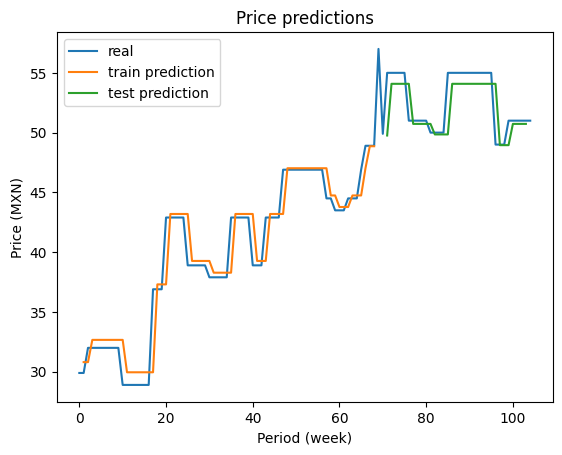

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real')
plt.plot(trainPredictPlot, label='train prediction')
plt.plot(testPredictPlot, label='test prediction')
plt.legend(loc="upper left")
plt.title("Price predictions")
plt.xlabel("Period (week)")
plt.ylabel("Price (MXN)")

plt.show()

*** Con el doble de epocas de entrenamientos y dos años de datos mejoró el desempeño

Predicción para la variable precio usando más neuronas, y parámetro huffle=False periodos atras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# set seed for reproducibility purposes
tf.random.set_seed(7)

In [ ]:
# dataset of a product, presentation, brand, store brand and municipality for 2 years, weekly frequency
dataframe = pd.read_csv('https://raw.githubusercontent.com/adavals/bedu-datascience-f3m2/main/dat/QQP_2021_2022_ACEITE_1LT_NUTRIOLI_WALMART_GAM.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataframe.shape

(105, 1)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

70 35


In [ ]:
# convert an array of values into a dataset matrix setting the look_back number of periods as features to predict
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1  # number of periods to use as features to predict
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

(68, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX[:5]

array([[[0.03558719]],

       [[0.03558719]],

       [[0.11032033]],

       [[0.11032033]],

       [[0.11032033]]], dtype=float32)

In [ ]:
# create and fit the LSTM network
model_2_year_200_epochs_dm = Sequential()
model_2_year_200_epochs_dm.add(LSTM(16, input_shape=(1, look_back)))
model_2_year_200_epochs_dm.add(Dense(1))
model_2_year_200_epochs_dm.compile(loss='mean_squared_error', optimizer='adam')
model_2_year_200_epochs_dm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,shuffle=False)

Epoch 1/100
68/68 - 2s - loss: 0.1069 - 2s/epoch - 31ms/step
Epoch 2/100
68/68 - 0s - loss: 0.0336 - 144ms/epoch - 2ms/step
Epoch 3/100
68/68 - 0s - loss: 0.0253 - 171ms/epoch - 3ms/step
Epoch 4/100
68/68 - 0s - loss: 0.0247 - 145ms/epoch - 2ms/step
Epoch 5/100
68/68 - 0s - loss: 0.0220 - 146ms/epoch - 2ms/step
Epoch 6/100
68/68 - 0s - loss: 0.0189 - 154ms/epoch - 2ms/step
Epoch 7/100
68/68 - 0s - loss: 0.0161 - 147ms/epoch - 2ms/step
Epoch 8/100
68/68 - 0s - loss: 0.0134 - 154ms/epoch - 2ms/step
Epoch 9/100
68/68 - 0s - loss: 0.0111 - 135ms/epoch - 2ms/step
Epoch 10/100
68/68 - 0s - loss: 0.0091 - 129ms/epoch - 2ms/step
Epoch 11/100
68/68 - 0s - loss: 0.0075 - 148ms/epoch - 2ms/step
Epoch 12/100
68/68 - 0s - loss: 0.0063 - 135ms/epoch - 2ms/step
Epoch 13/100
68/68 - 0s - loss: 0.0054 - 136ms/epoch - 2ms/step
Epoch 14/100
68/68 - 0s - loss: 0.0049 - 142ms/epoch - 2ms/step
Epoch 15/100
68/68 - 0s - loss: 0.0045 - 131ms/epoch - 2ms/step
Epoch 16/100
68/68 - 0s - loss: 0.0044 - 153ms/epoc

In [ ]:
# make predictions
trainPredict = model_2_year_200_epochs_dm.predict(trainX)
testPredict = model_2_year_200_epochs_dm.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 5ms/step
Train Score: 1.77 RMSE
Test Score: 1.78 RMSE


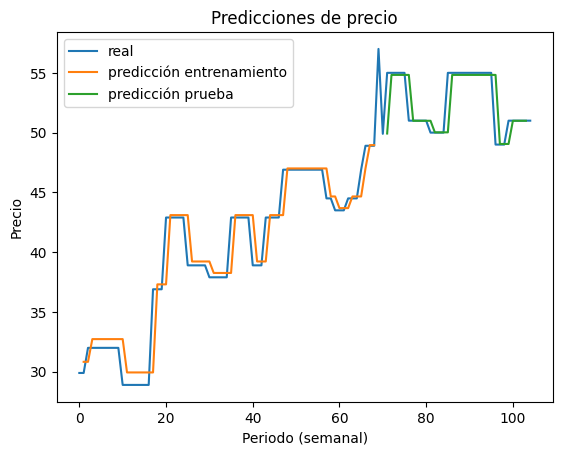

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='real')
plt.plot(trainPredictPlot, label='predicción entrenamiento')
plt.plot(testPredictPlot, label='predicción prueba')
plt.legend(loc="upper left")
plt.title("Predicciones de precio")
plt.xlabel("Periodo (semanal)")
plt.ylabel("Precio")

plt.show()

In [ ]:
testX, testY = create_dataset(test, look_back)

In [ ]:
tY = pd.DataFrame(testY)

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [ ]:
testY = testY.reshape(-1, 1)

In [ ]:
testYtrue = scaler.inverse_transform(tY)

In [ ]:
dfTestPredict = pd.DataFrame(testPredict)
dfTestTrue = pd.DataFrame(testYtrue)

In [ ]:
mape = mape(dfTestTrue.values, dfTestPredict.values)
print(mape)

1.47


<a name="celda-referencias"></a>
🏠 [Inicio](#celda-conclusiones)
# ***Conclusiones***
---

Los modelos de clasificación supervisada y no supervisada han resultado útiles para obtener más conocimiento de los datos y para proporcionar signos de prevención al consumidor respecto a qué tanto puede variar el precio de un producto respecto al mínimo.

También fue posible encontrar un modelo de machine learning para predecir el próximo precio con un buen desempeño, lo que puede ser una base sólida para proporcionar servicios a través de una aplicación como indicar al consumidor el próximo valor total de conjuntos de productos de su interés ("carritos de compra") y recomendaciones sobre en qué tienda o zona los podrá encontrar a un menor costo, entre otros.

<a name="celda-referencias"></a>
🏠 [Inicio](#celda-contenido)  
### ***Referencias***
---
- Documentación

  - [scikit-learn](https://scikit-learn.org/stable/)

- Artículos en internet:
  - https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  - https://www.datasciencewithmarco.com/blog/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy
  - https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
  - https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502

- Comunidades:
  - https://stackoverflow.com/